In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Imports 

import os
import spacy
from IPython.display import display 

from src.pipelinelib.querying import Parser, Queryable
from src.pipelinelib.text_body import TextBody
from src.pipelinelib.pipeline import Pipeline

from src.sigmund.preprocessing.words import Tokenizer, Stemmer, Lemmatizer
from src.sigmund.features.tfidf import FeatureTFIDF
from src.sigmund.features.liwc import Liwc
from src.sigmund.features.pos import PartOfSpeech
from src.sigmund.features.vocabulary_size import VocabularySize
from src.sigmund.classification.pca import PCAReduction
from src.sigmund.classification.naive_bayes import NaiveBayes
from src.sigmund.classification.merger import FeatureMerger
from src.sigmund.classification.linear_discriminant_analysis import LinearDiscriminantAnalysisClassifier
from src.sigmund.extensions import *

nlp = spacy.load("de_core_news_sm", disable=["ner", "parser"])

In [8]:
# Read data

folder = os.path.join(os.getcwd(), "data", "transcripts")
files = [os.path.join(root, f) for root, _, files in os.walk(folder) for f in files if f.endswith(".docx")]
parser = Parser(nlp=nlp, metadata_path="./data/transcripts/Kopie von Transkriptionspaare_Daten.xls")
parser.read_from_files(files)
queryable = Queryable.from_parser(parser)

=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 182_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 27_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 60_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 47_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 58_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 29_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 87_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 81_T1_IM_FW_corrected.docx ===
=== Parser: reading from /home/alexander/Projects/sigmund/data/transcripts/Paar 105_T1_IM_FW_corrected.docx ===

# Pipeline with Voting-Classifier

=== Starting pipeline with ['Tokenizer', 'Stemmer', 'Lemmatizer', 'FeatureTFIDF', 'NaiveBayes for [tfidf_document_mf(feature)]', 'Liwc', 'NaiveBayes for [liwc_document_mf(feature)]', 'PartOfSpeech', 'NaiveBayes for [pos_document_mf(feature)]', 'NaiveBayes for [nb_class_tfidf(classifier), nb_class_liwc(classifier), nb_class_pos(classifier)]'] ===
Executing Tokenizer
Executing Stemmer
Executing Lemmatizer
Executing FeatureTFIDF
Executing NaiveBayes for [tfidf_document_mf(feature)]


,couple_id,is_depressed_group,ja,auch,wenn,also,werden,schon,wir,und,haben,du,sehr
0,182,False,0.298184,0.156191,0.063896,0.021299,0.014199,0.023329,0.092295,0.198789,0.106494,0.191689,0.042621
1,27,True,0.294945,0.196630,0.163858,0.024579,0.049157,0.000000,0.180244,0.180244,0.057350,0.221209,0.019674
2,60,True,0.257762,0.171841,0.121721,0.028640,0.093081,0.164692,0.085921,0.157521,0.078760,0.264922,0.008597
3,47,True,0.357365,0.299189,0.116351,0.074797,0.041554,0.027309,0.157905,0.199459,0.058176,0.132973,0.029936
4,58,False,0.108745,0.163118,0.027186,0.006797,0.040780,0.029777,0.156321,0.244677,0.142728,0.224287,0.146888
5,29,False,0.261638,0.098114,0.039246,0.078491,0.032705,0.071644,0.045787,0.235474,0.143901,0.215851,0.054975
6,87,False,0.387505,0.182681,0.155002,0.033215,0.033215,0.036380,0.105180,0.132859,0.121787,0.359826,0.046527
7,81,False,0.141206,0.111253,0.077021,0.004279,0.021395,0.018747,0.179716,0.308085,0.201111,0.209669,0.000000
8,105,True,0.249690,0.168908,0.102813,0.066094,0.066094,0.032175,0.124845,0.139532,0.176252,0.330472,0.000000
9,138,True,0.446558,0.195369,0.055820,0.050238,0.016746,0.091710,0.150713,0.167459,0.044656,0.061402,0.053617


'Predictions on the test set'

,couple_id,is_depressed_group,predicted
8,105,1,1
1,27,1,1
5,29,0,1
0,182,0,1
7,81,0,1


'Cross-Validation'

,couple_id,is_depressed_group,is_depressed_group,predicted
0,182,False,0,1
1,27,True,1,1
2,60,True,1,0
3,47,True,1,1
4,58,False,0,0
5,29,False,0,0
6,87,False,0,1
7,81,False,0,0
8,105,True,1,0
9,138,True,1,1


'Accuracy on test set: 0.4'

'Accuracy with cross-validation: [0.5 0.5 1.  0.  1. ] | mean = 0.6'

Executing Liwc
Executing NaiveBayes for [liwc_document_mf(feature)]


,couple_id,is_depressed_group,document_id,Posemo,Past,Present,Future,Metaph,Death,Affect,Incl,Achieve
0,182,False,0,55.0,22.0,103.0,0.0,3.0,0.0,78.0,70.0,28.0
1,27,True,1,112.0,21.0,97.0,1.0,15.0,2.0,120.0,63.0,34.0
2,60,True,2,51.0,31.0,92.0,8.0,8.0,3.0,71.0,65.0,42.0
3,47,True,3,69.0,19.0,97.0,5.0,10.0,3.0,84.0,73.0,30.0
4,58,False,4,80.0,50.0,107.0,8.0,8.0,1.0,99.0,97.0,34.0
5,29,False,5,62.0,58.0,106.0,3.0,7.0,2.0,72.0,77.0,26.0
6,87,False,6,73.0,33.0,108.0,2.0,5.0,2.0,79.0,78.0,31.0
7,81,False,7,102.0,76.0,148.0,6.0,2.0,0.0,115.0,135.0,37.0
8,105,True,8,81.0,30.0,96.0,6.0,2.0,0.0,86.0,67.0,30.0
9,138,True,9,61.0,39.0,97.0,4.0,7.0,3.0,68.0,83.0,33.0


'Predictions on the test set'

,couple_id,is_depressed_group,predicted
8,105,1,0
1,27,1,0
5,29,0,0
0,182,0,0
7,81,0,0


'Cross-Validation'

,couple_id,is_depressed_group,is_depressed_group,predicted
0,182,False,0,1
1,27,True,1,1
2,60,True,1,1
3,47,True,1,1
4,58,False,0,0
5,29,False,0,0
6,87,False,0,0
7,81,False,0,0
8,105,True,1,1
9,138,True,1,0


'Accuracy on test set: 0.6'

'Accuracy with cross-validation: [0.5 1.  1.  1.  0.5] | mean = 0.8'

Executing PartOfSpeech
Executing NaiveBayes for [pos_document_mf(feature)]


,couple_id,is_depressed_group,document_id,ADV,PPER,ADJD,VAFIN,KON
0,182,False,0,274.0,181.0,53.0,57.0,44.0
1,27,True,1,147.0,172.0,72.0,62.0,29.0
2,60,True,2,237.0,148.0,71.0,70.0,25.0
3,47,True,3,214.0,129.0,72.0,57.0,35.0
4,58,False,4,213.0,173.0,91.0,74.0,47.0
5,29,False,5,231.0,161.0,67.0,88.0,44.0
6,87,False,6,321.0,205.0,76.0,70.0,45.0
7,81,False,7,325.0,274.0,204.0,150.0,79.0
8,105,True,8,219.0,187.0,70.0,70.0,28.0
9,138,True,9,363.0,162.0,66.0,76.0,43.0


'Predictions on the test set'

,couple_id,is_depressed_group,predicted
8,105,1,0
1,27,1,0
5,29,0,0
0,182,0,0
7,81,0,0


'Cross-Validation'

,couple_id,is_depressed_group,is_depressed_group,predicted
0,182,False,0,1
1,27,True,1,0
2,60,True,1,1
3,47,True,1,0
4,58,False,0,0
5,29,False,0,0
6,87,False,0,1
7,81,False,0,1
8,105,True,1,1
9,138,True,1,0


'Accuracy on test set: 0.6'

'Accuracy with cross-validation: [0.  1.  0.5 0.5 0. ] | mean = 0.4'

Executing NaiveBayes for [nb_class_tfidf(classifier), nb_class_liwc(classifier), nb_class_pos(classifier)]


,couple_id,is_depressed_group,nb_class_tfidf_predicted,nb_class_liwc_predicted,nb_class_pos_predicted
0,182,False,1,1,1
1,27,True,1,1,0
2,60,True,0,1,1
3,47,True,1,1,0
4,58,False,0,0,0
5,29,False,0,0,0
6,87,False,1,0,1
7,81,False,0,0,1
8,105,True,0,1,1
9,138,True,1,0,0


'Predictions on the test set'

,couple_id,is_depressed_group,predicted
8,105,1,1
1,27,1,1
5,29,0,1
0,182,0,1
7,81,0,0


'Cross-Validation'

,couple_id,is_depressed_group,is_depressed_group,predicted
0,182,False,0,1
1,27,True,1,1
2,60,True,1,0
3,47,True,1,1
4,58,False,0,0
5,29,False,0,0
6,87,False,0,0
7,81,False,0,0
8,105,True,1,0
9,138,True,1,0


'Accuracy on test set: 0.6'

'Accuracy with cross-validation: [0.5 0.5 1.  0.5 0.5] | mean = 0.6'

=== Finished pipeline execution ===


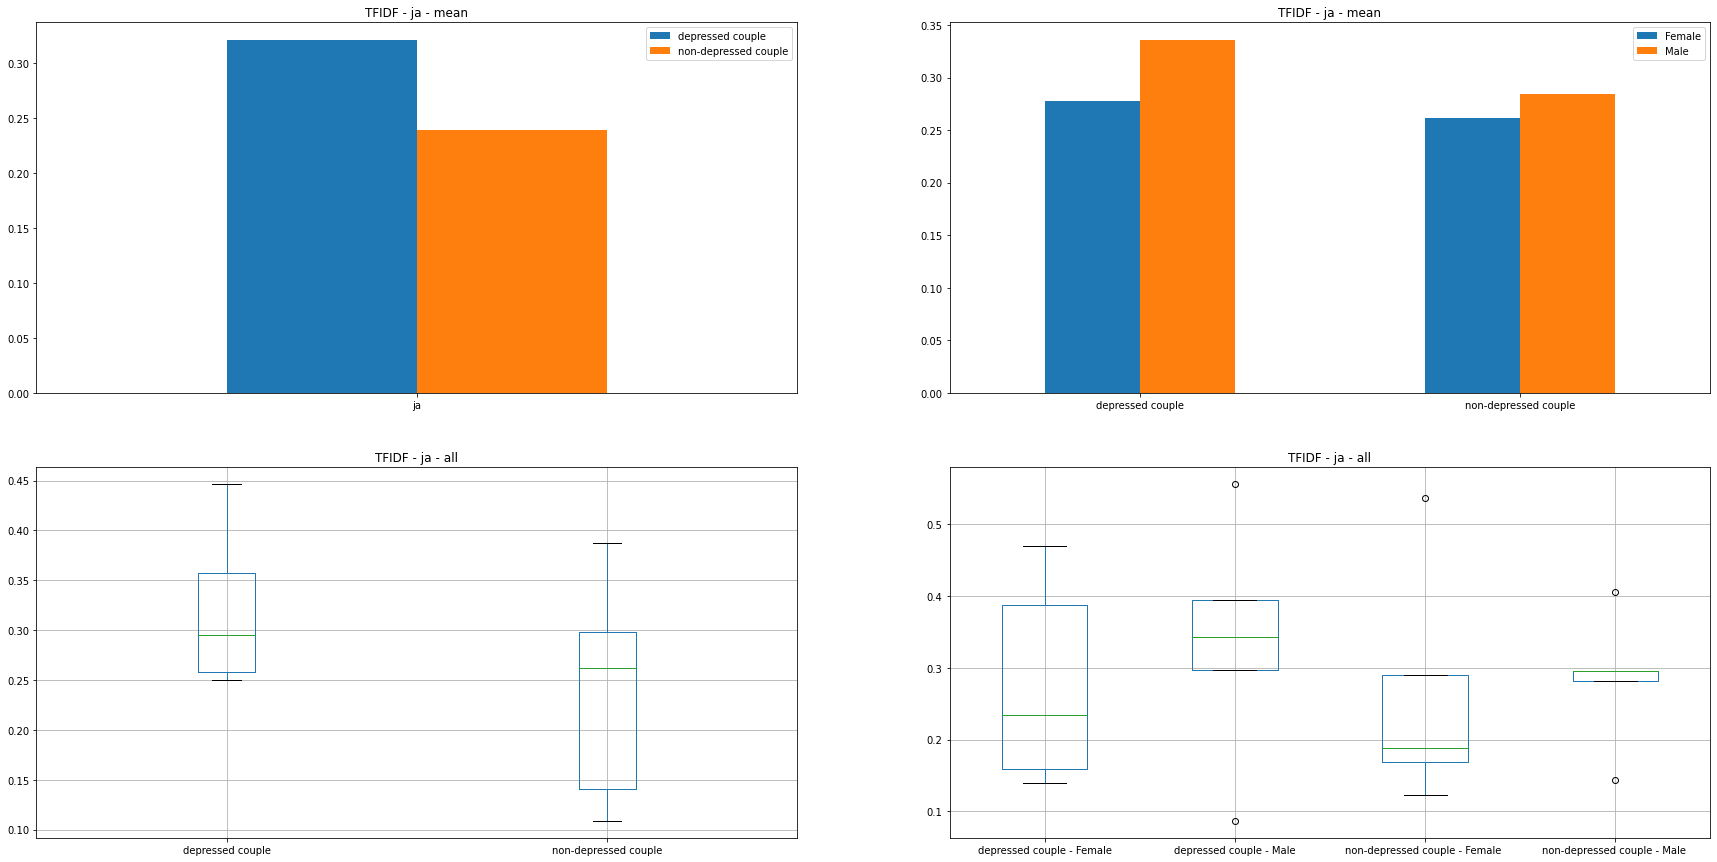

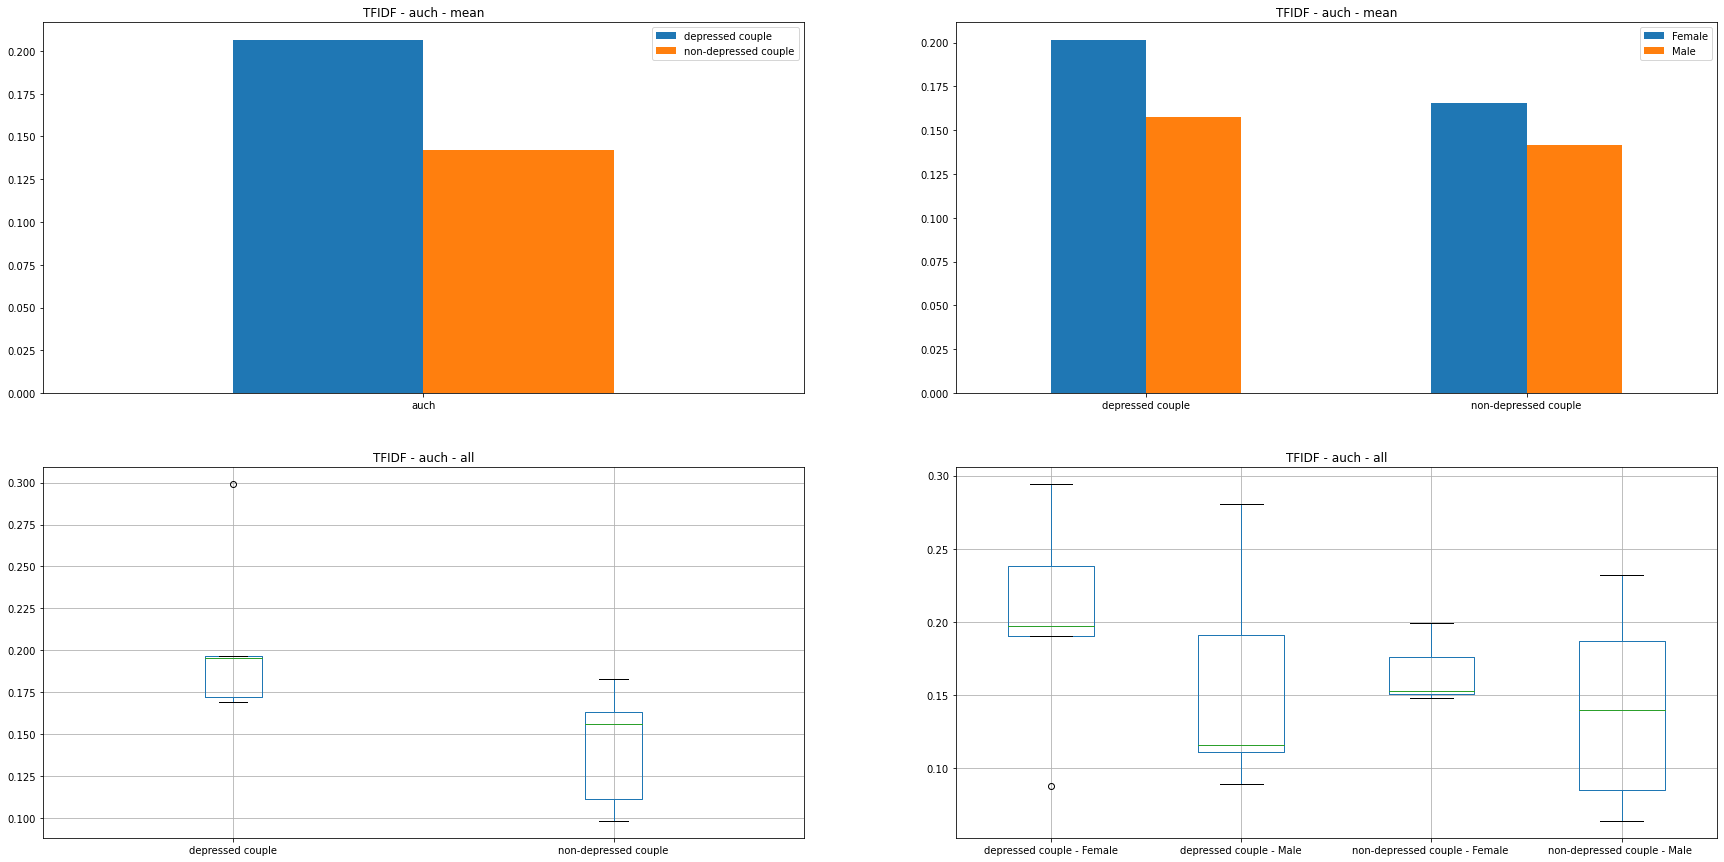

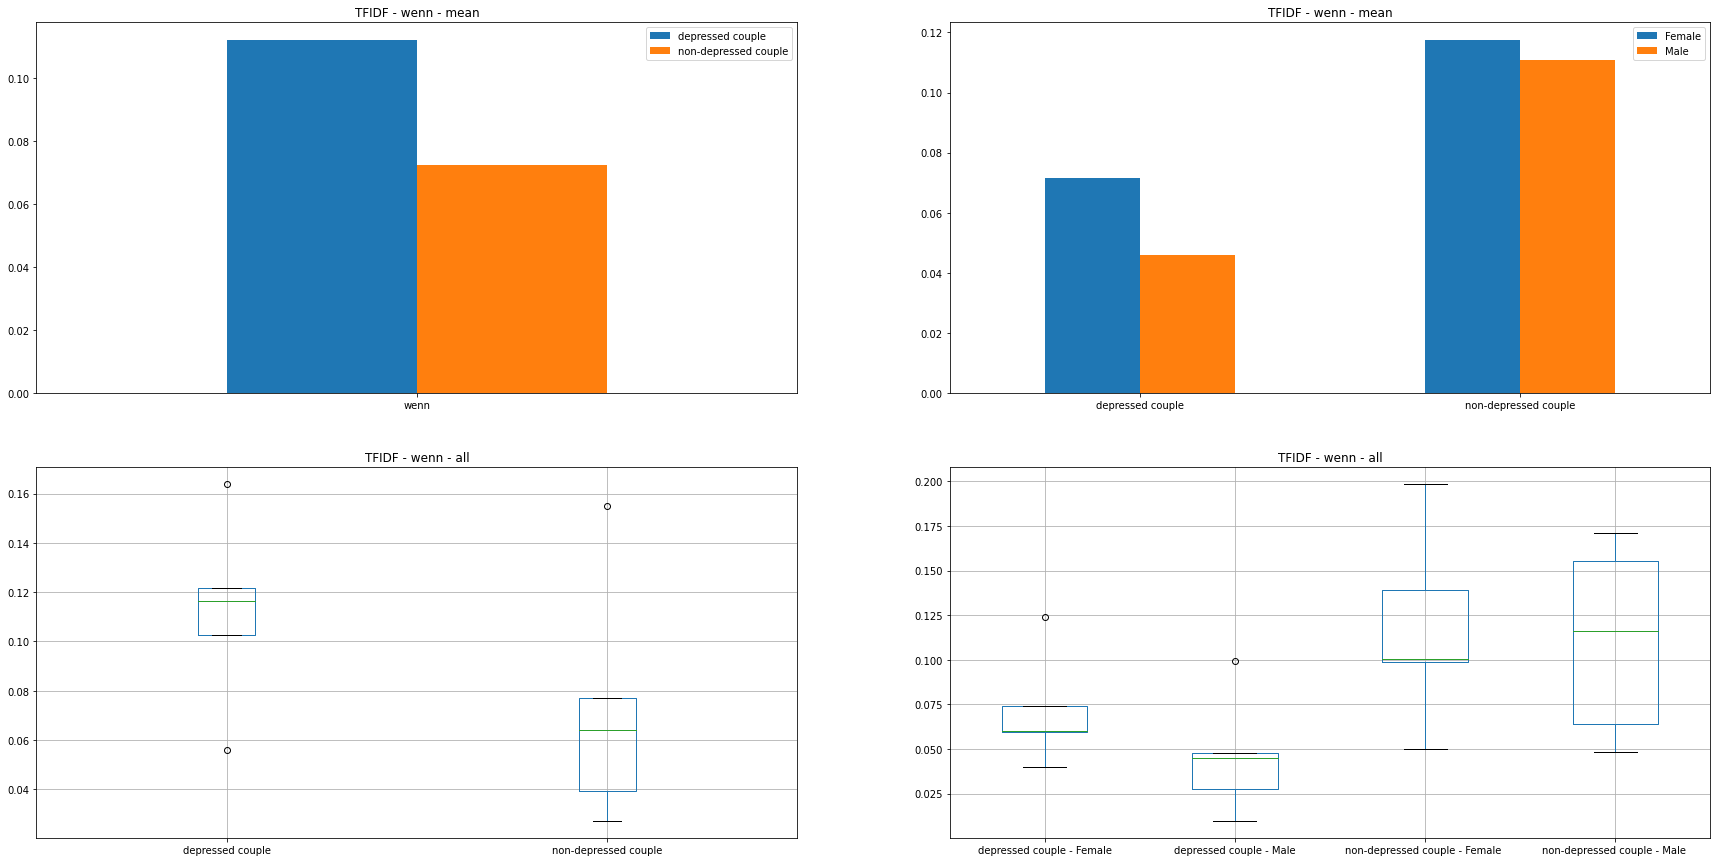

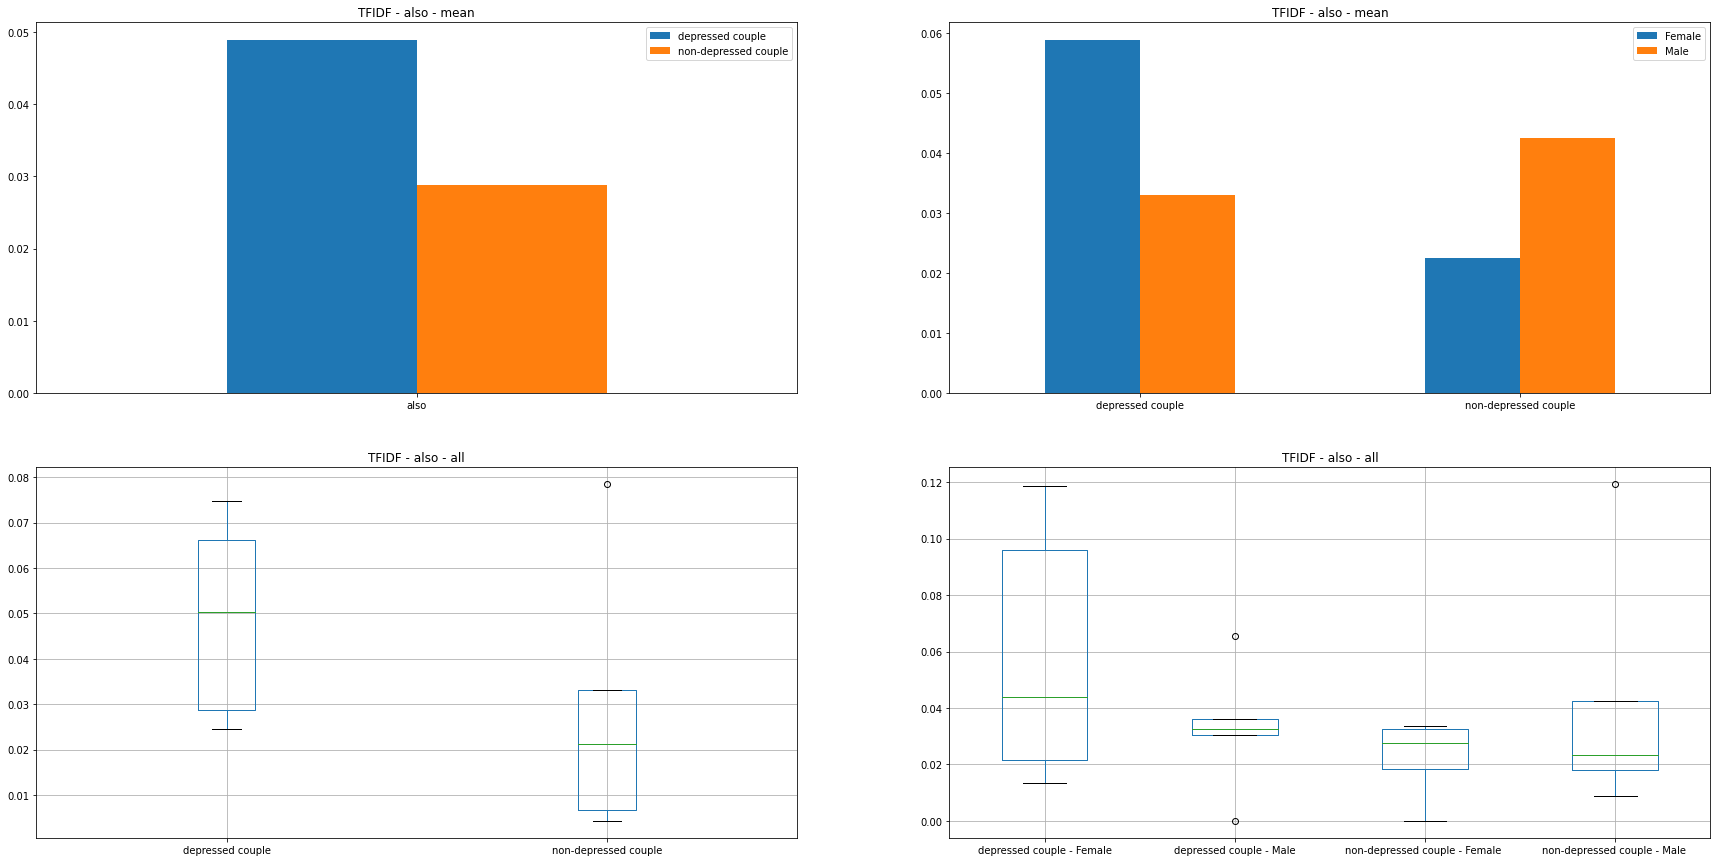

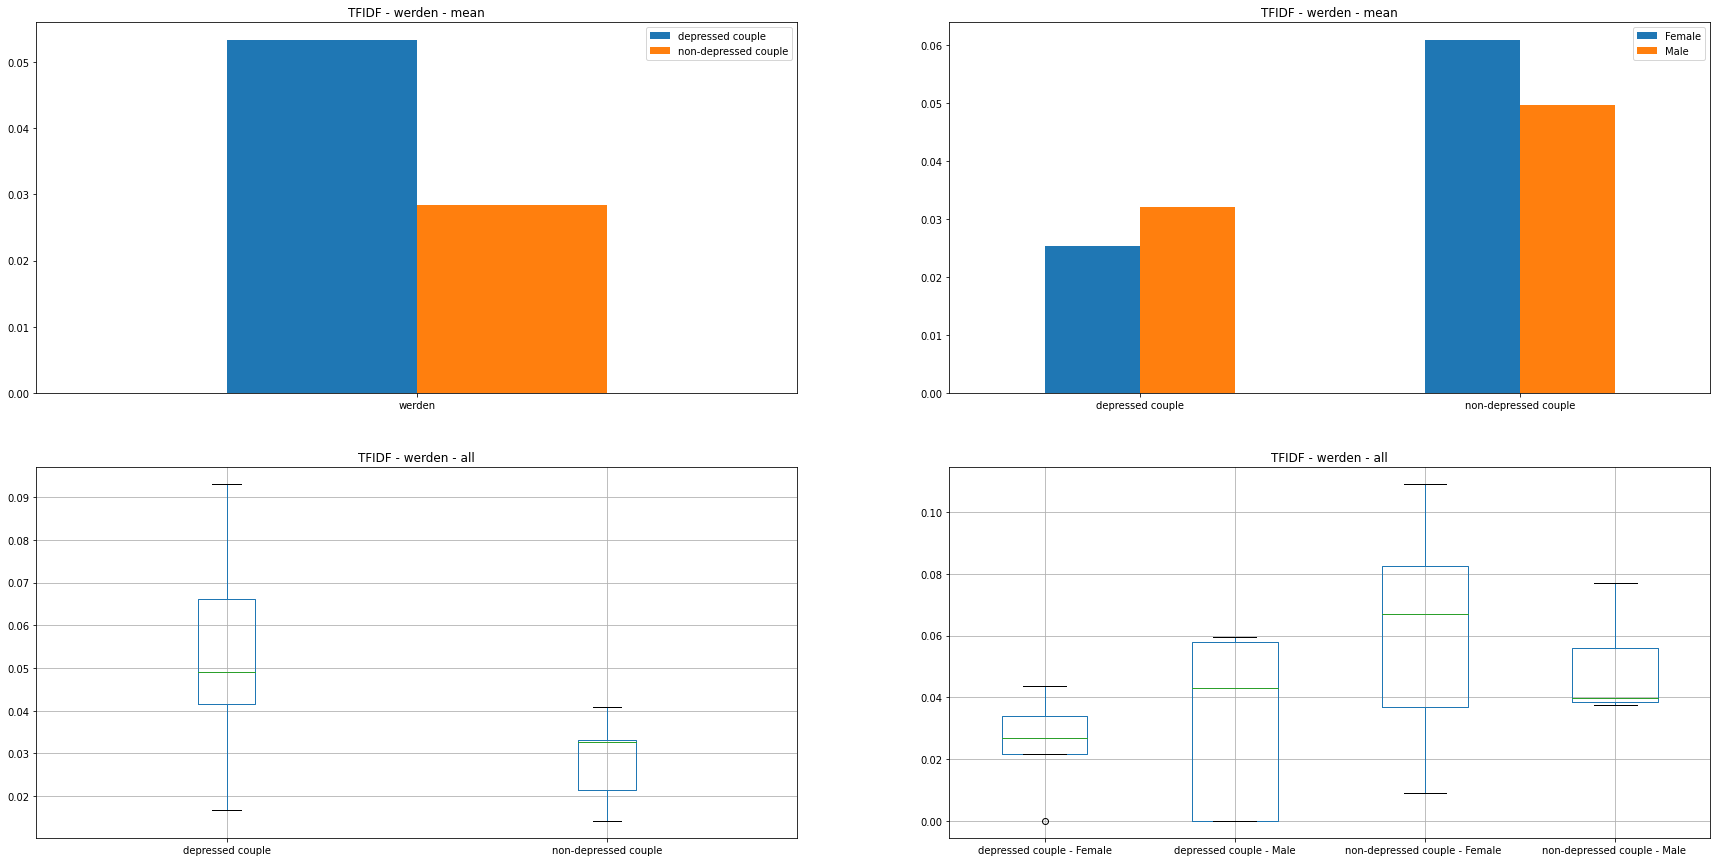

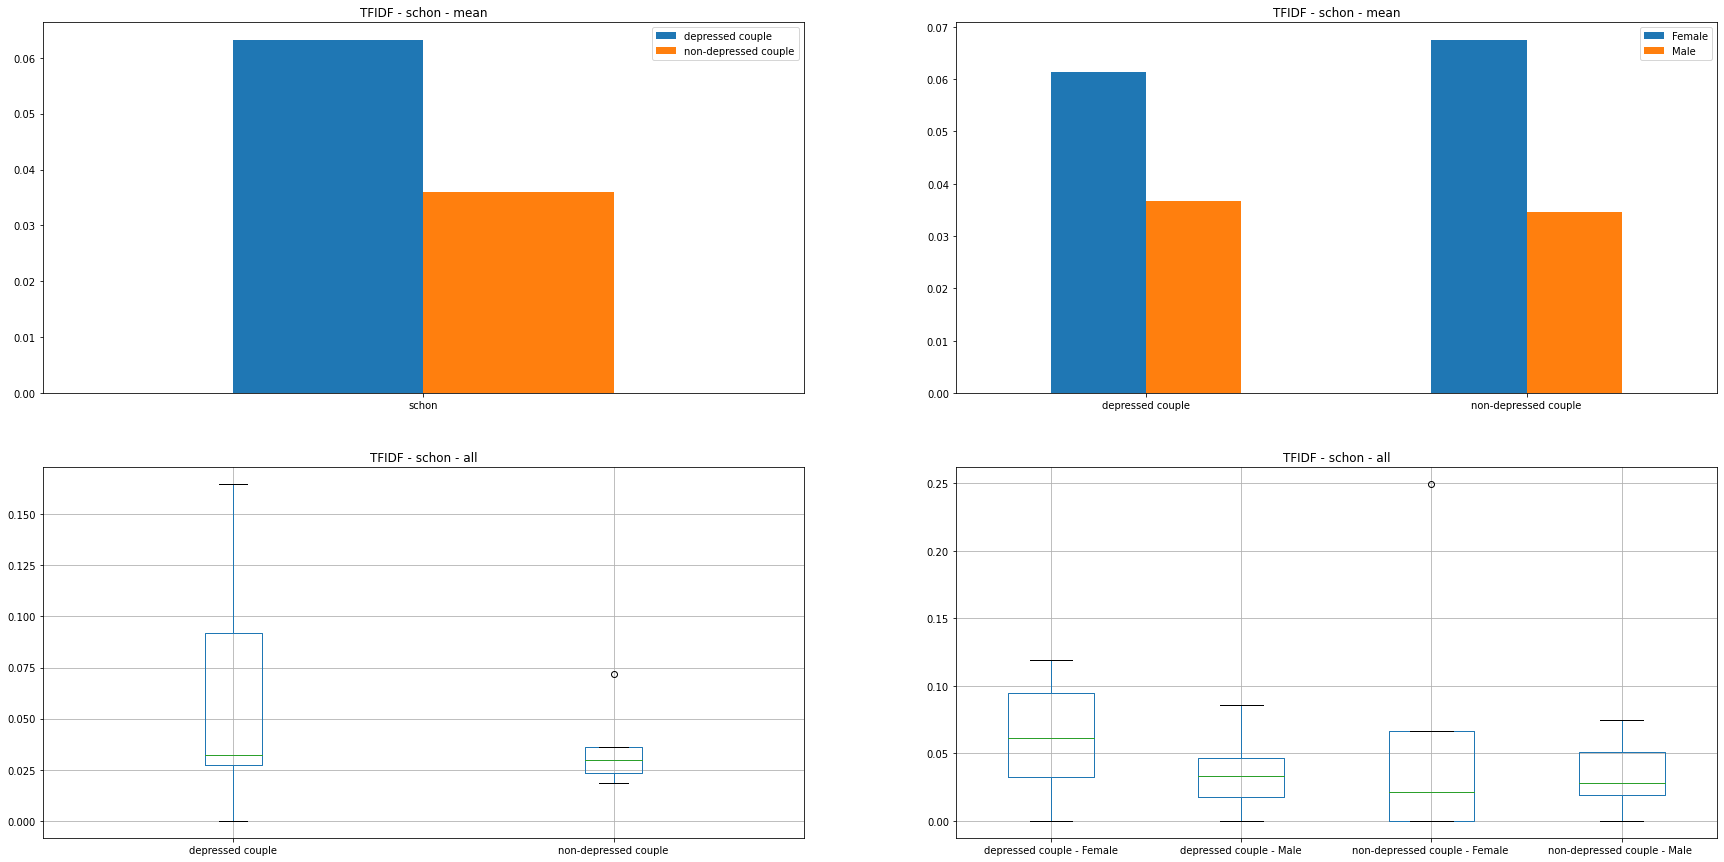

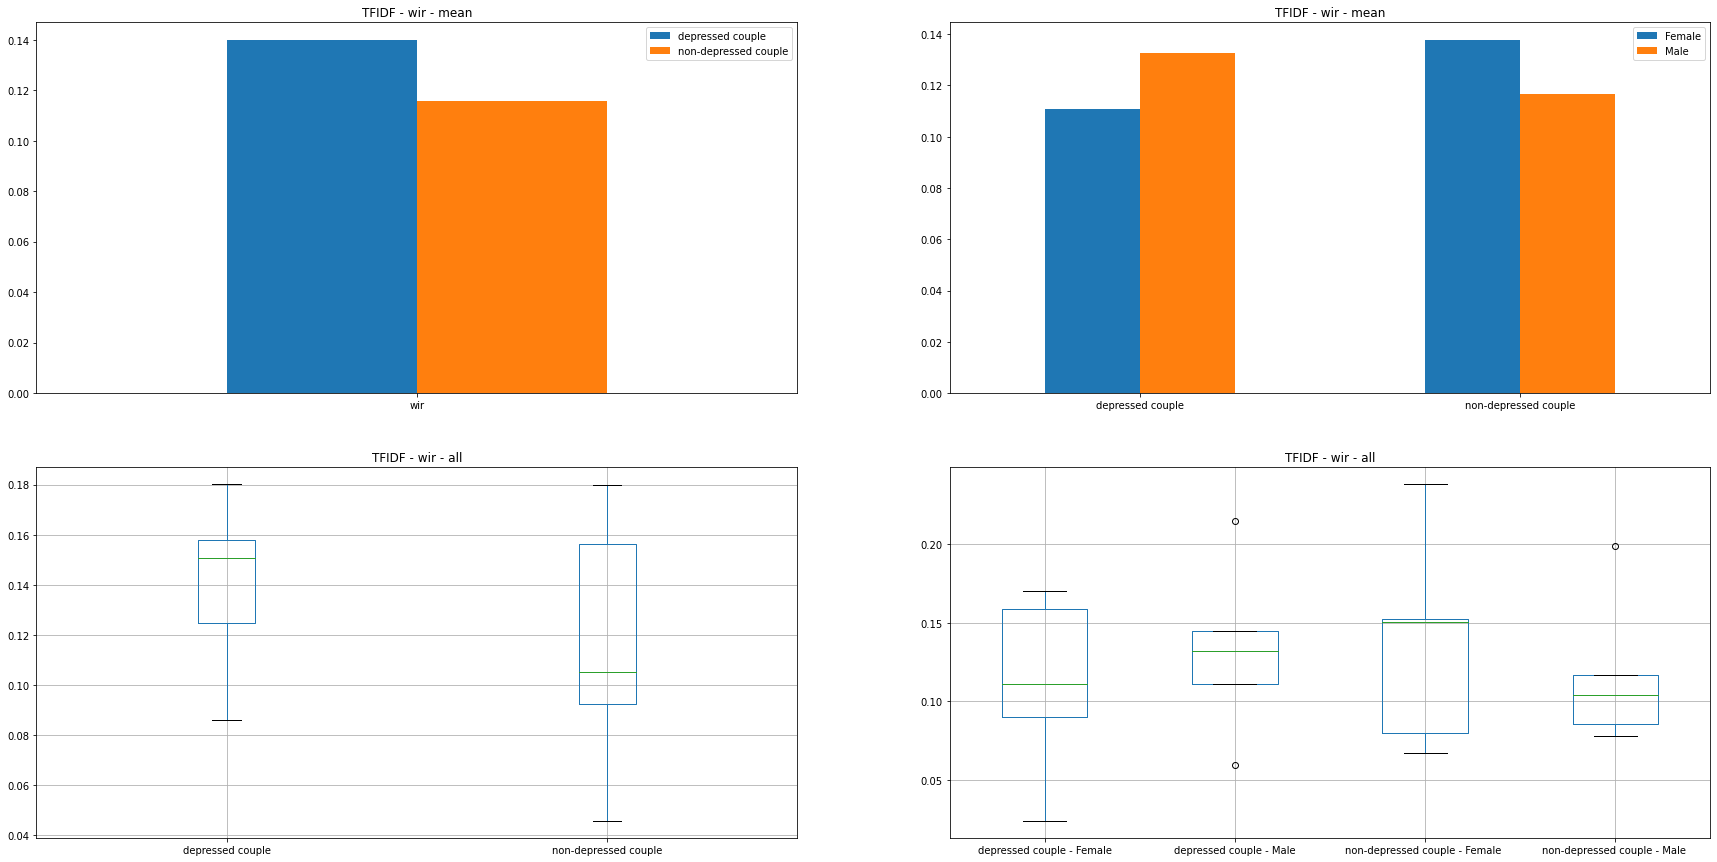

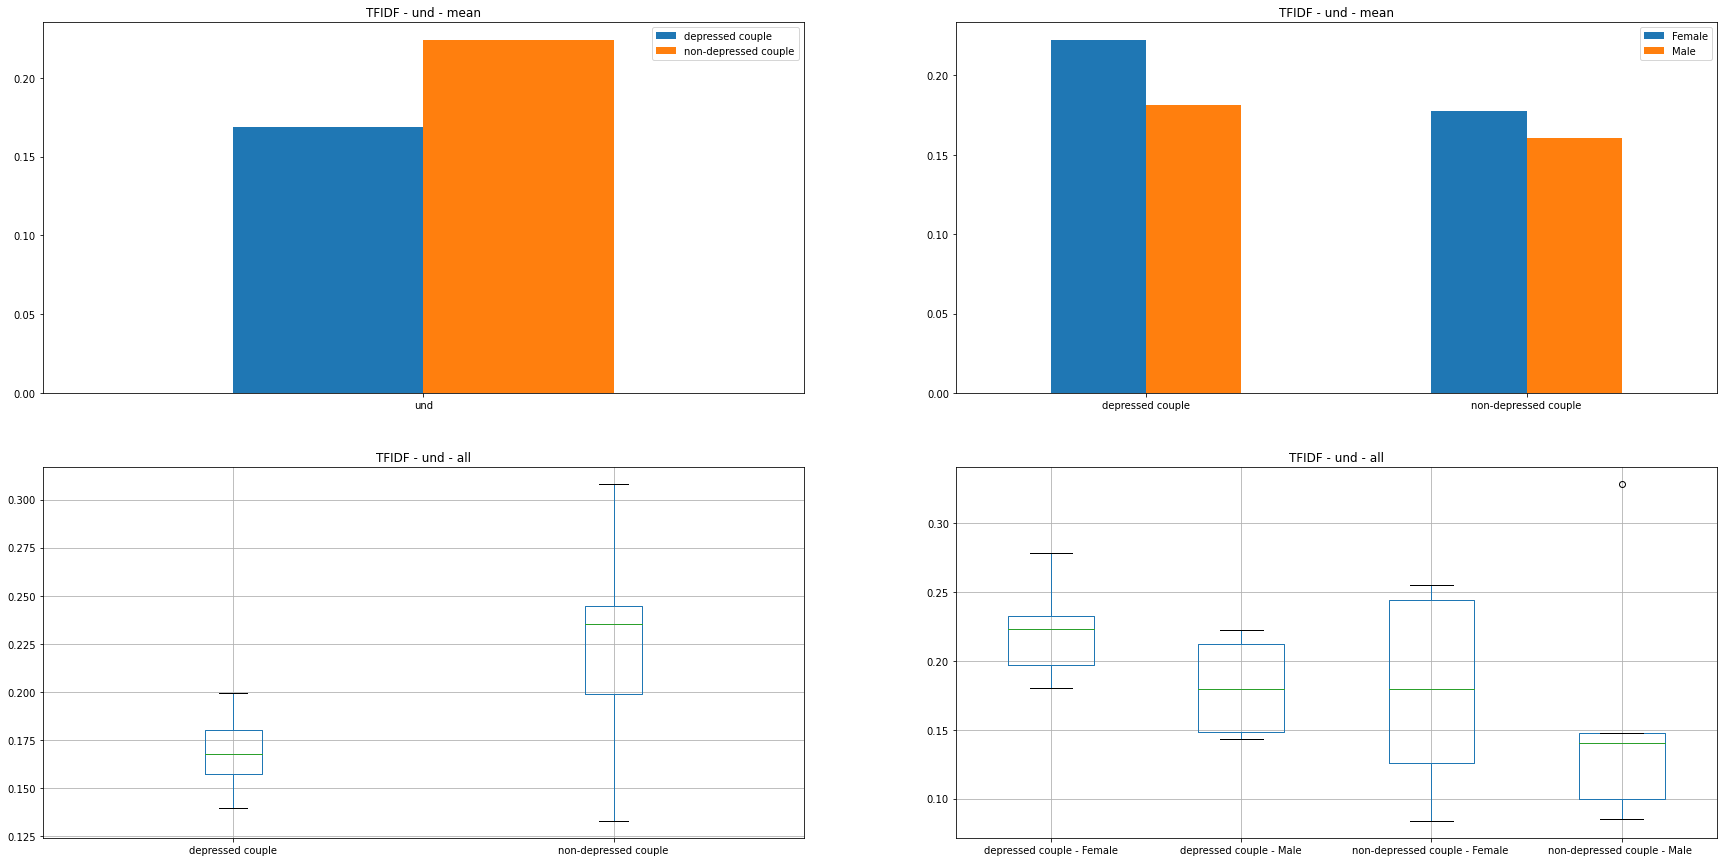

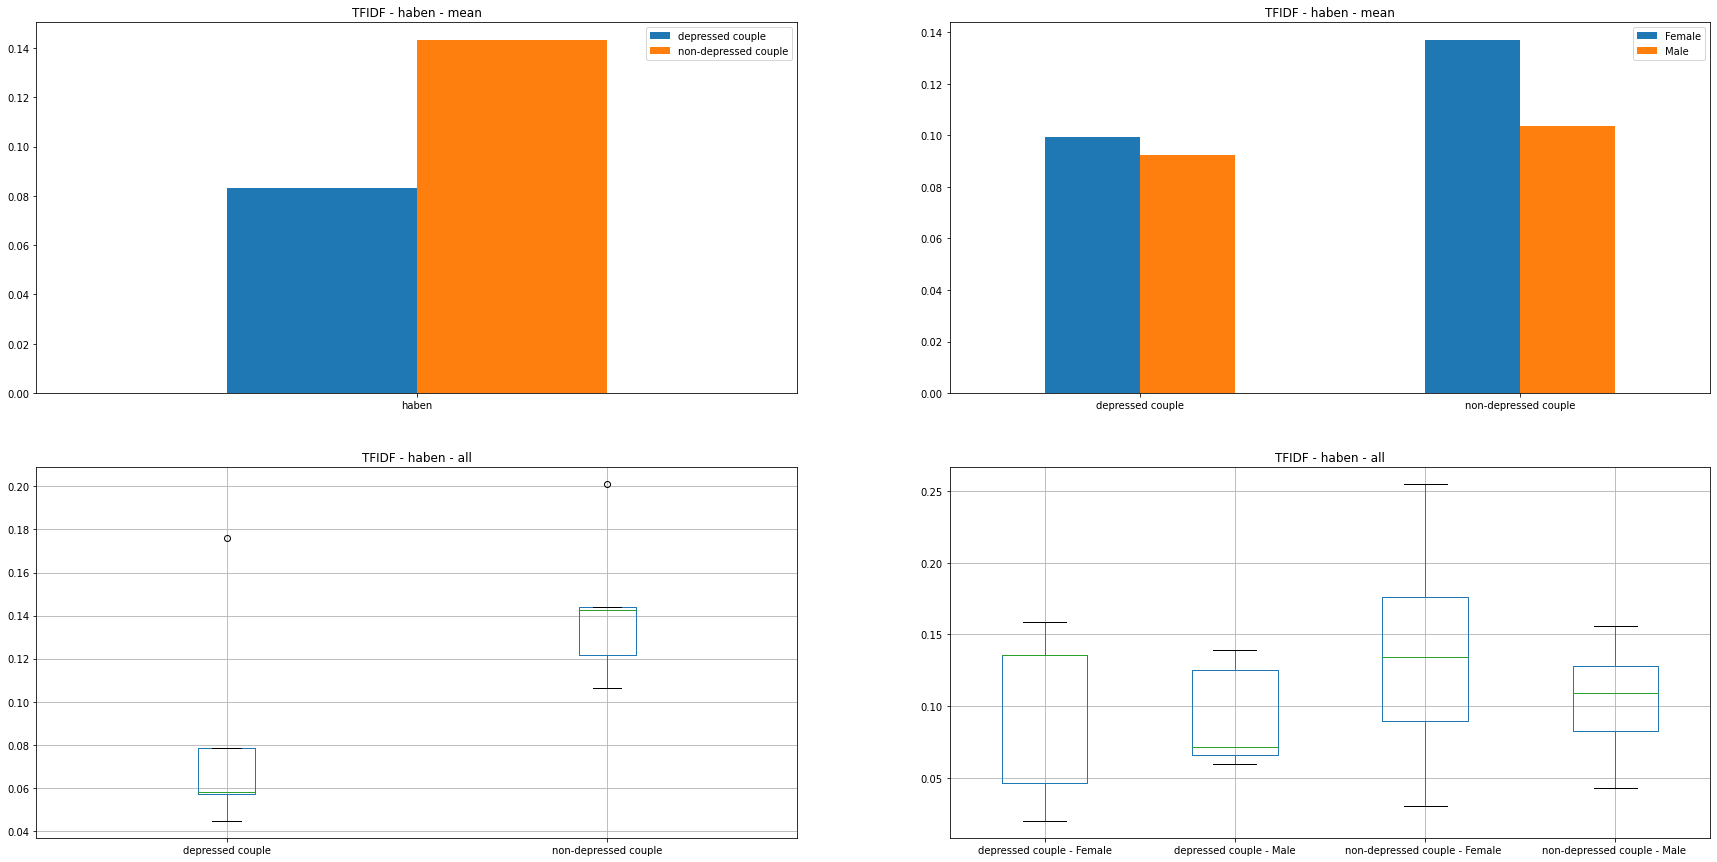

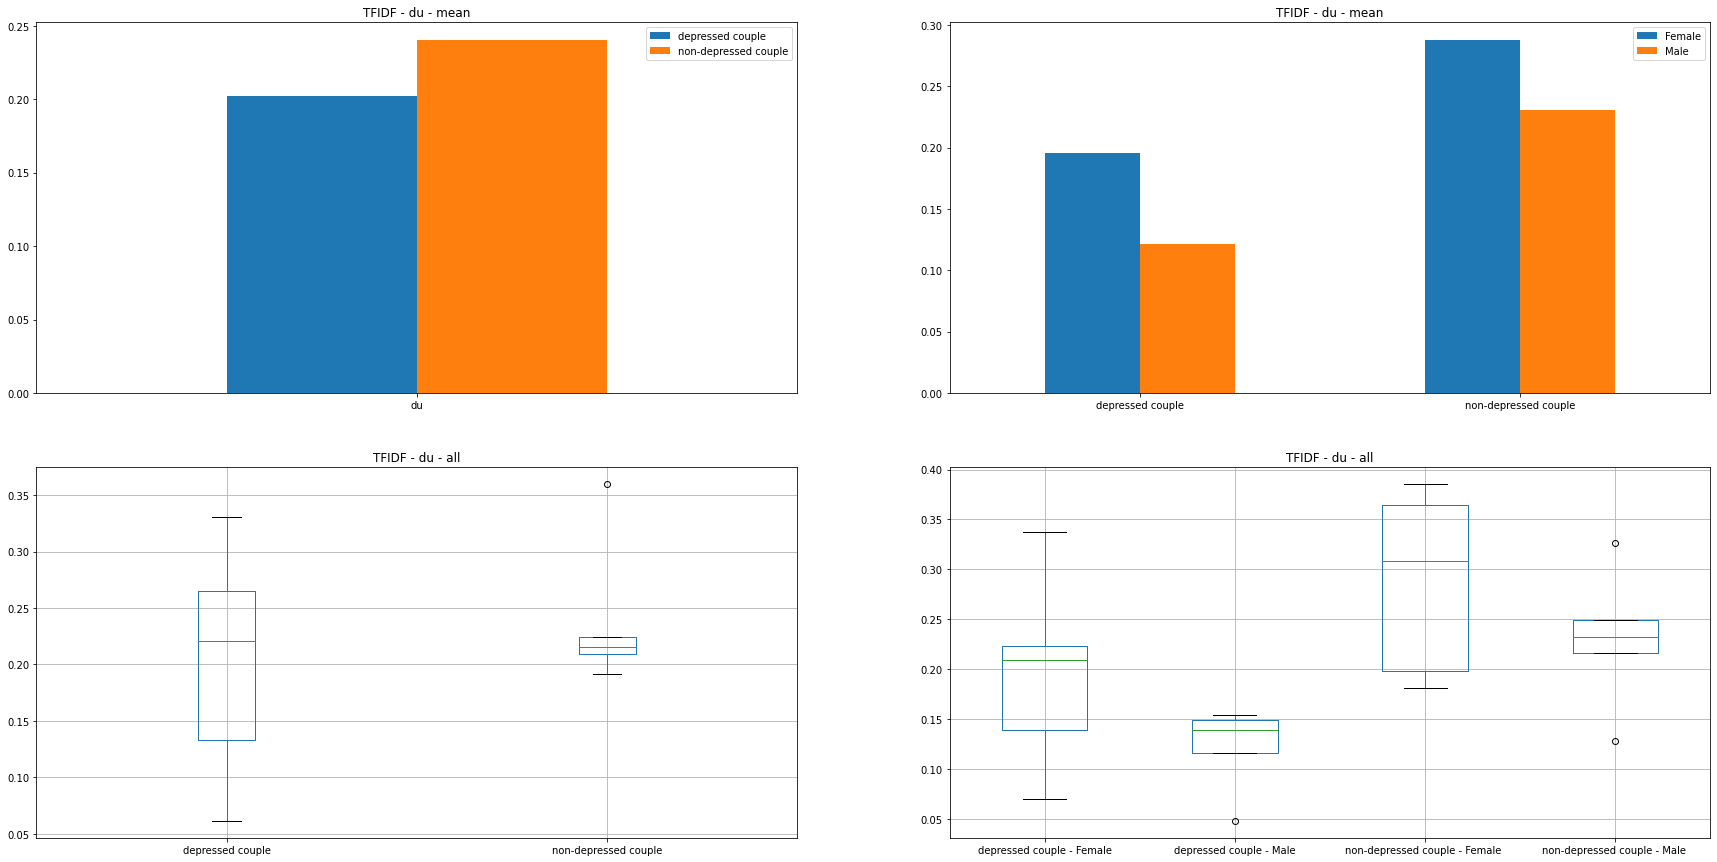

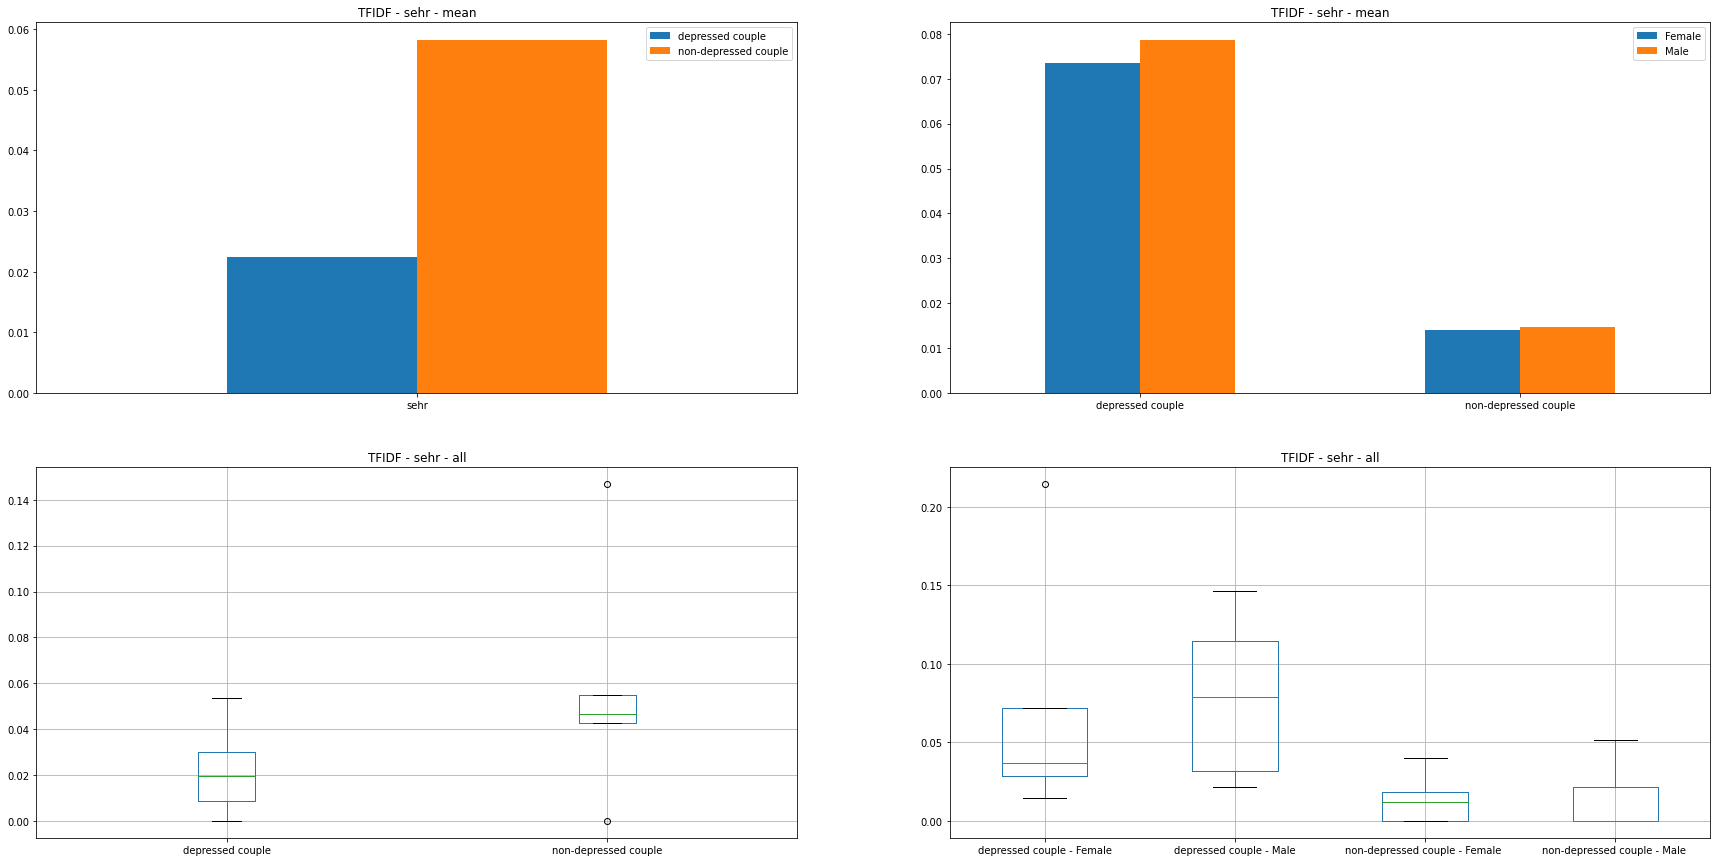

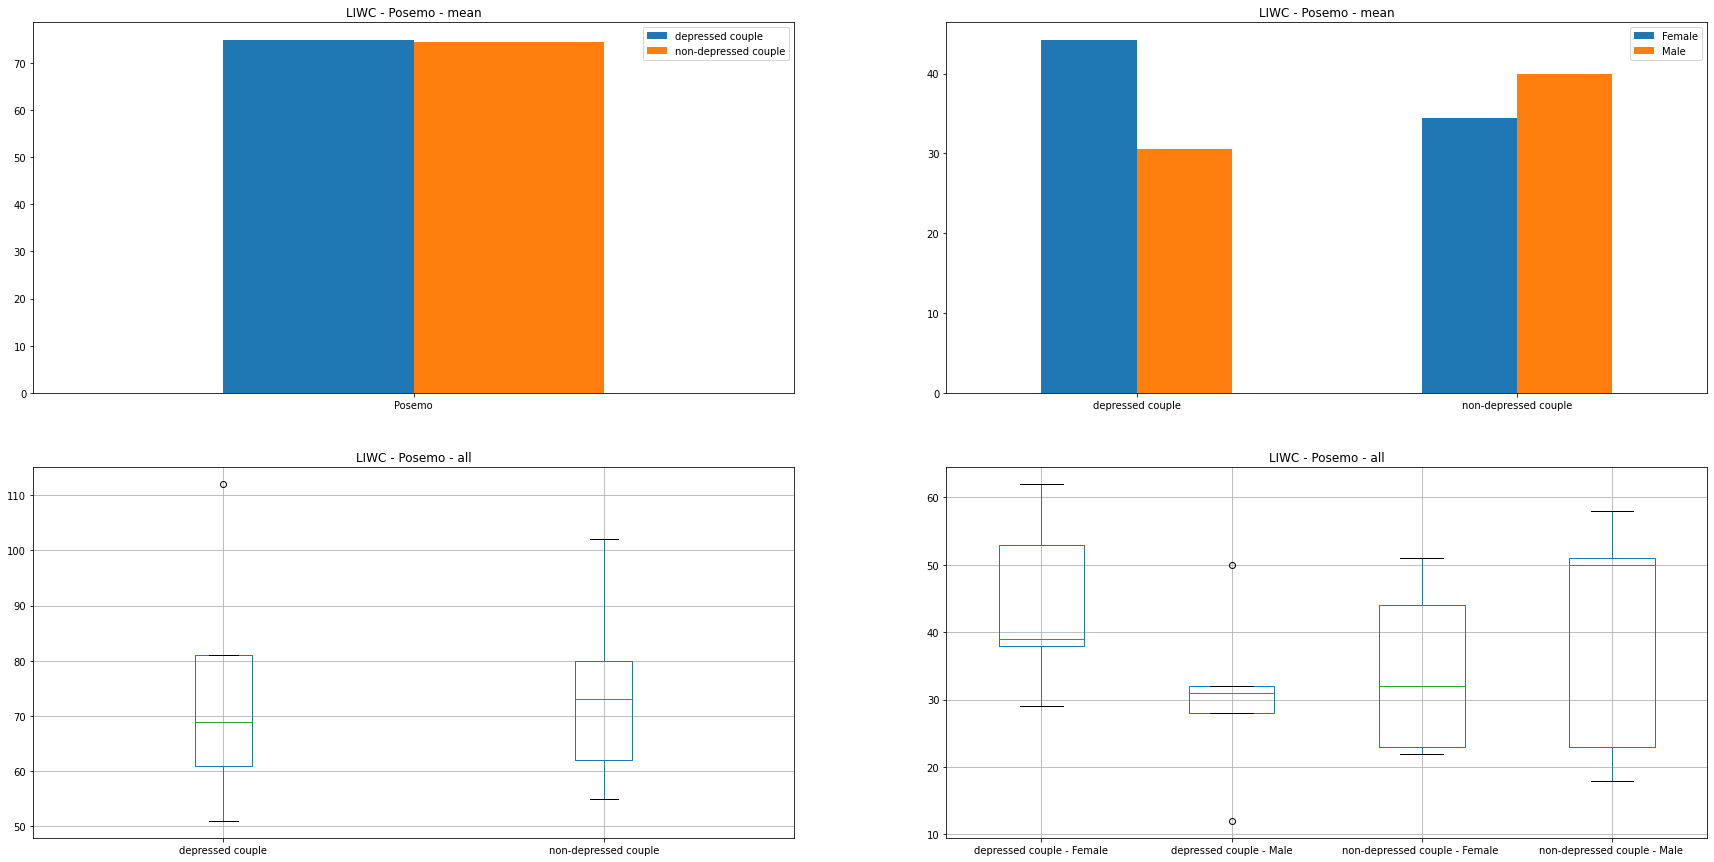

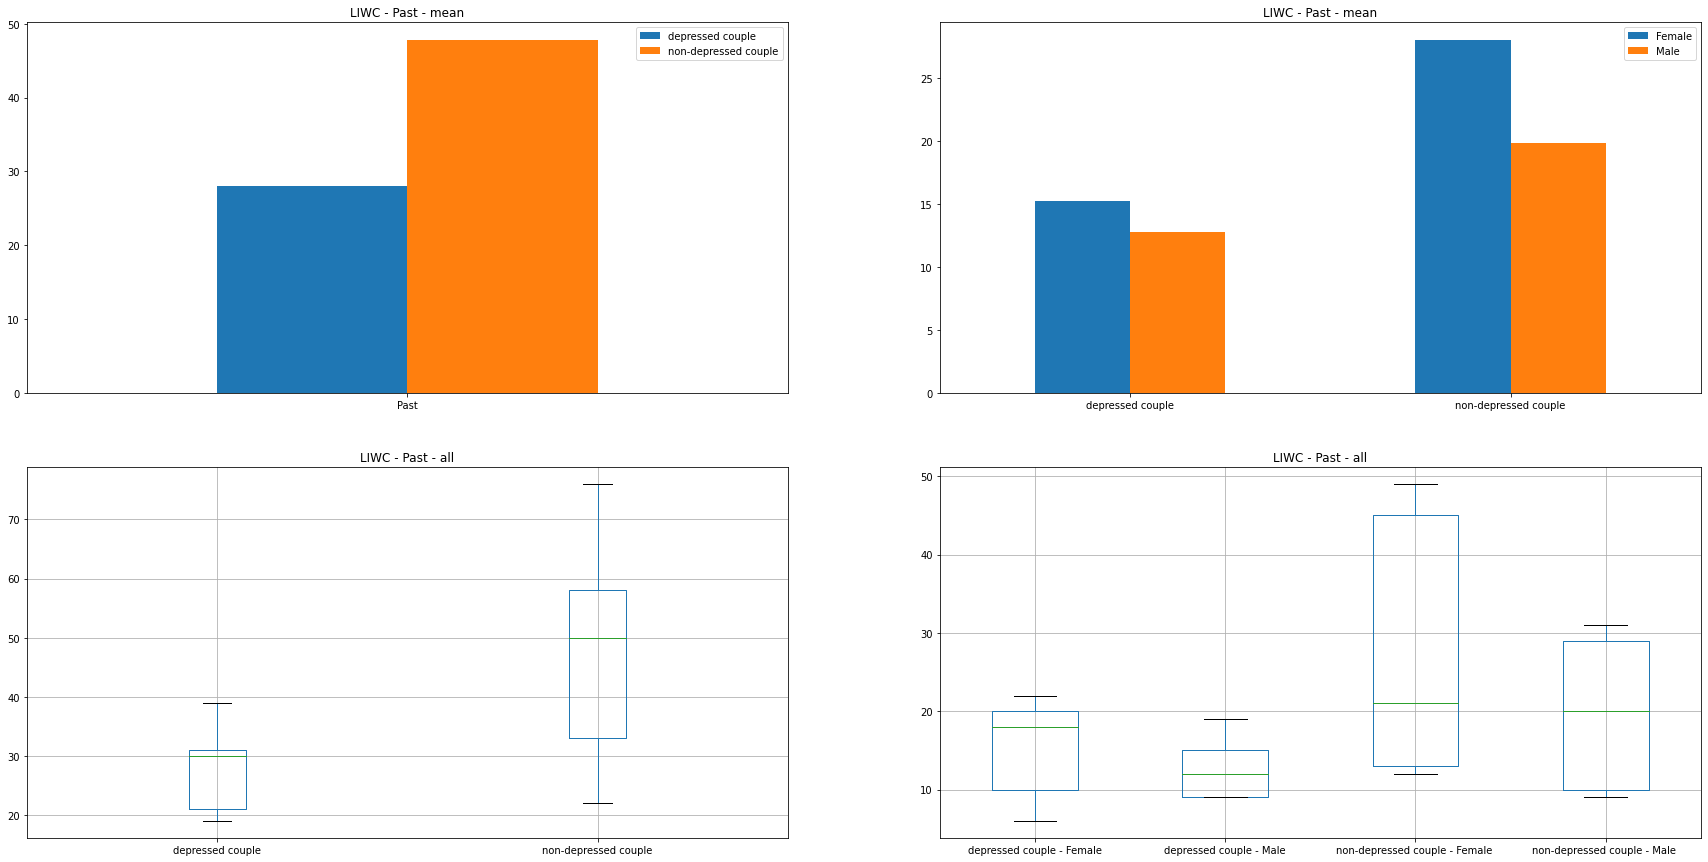

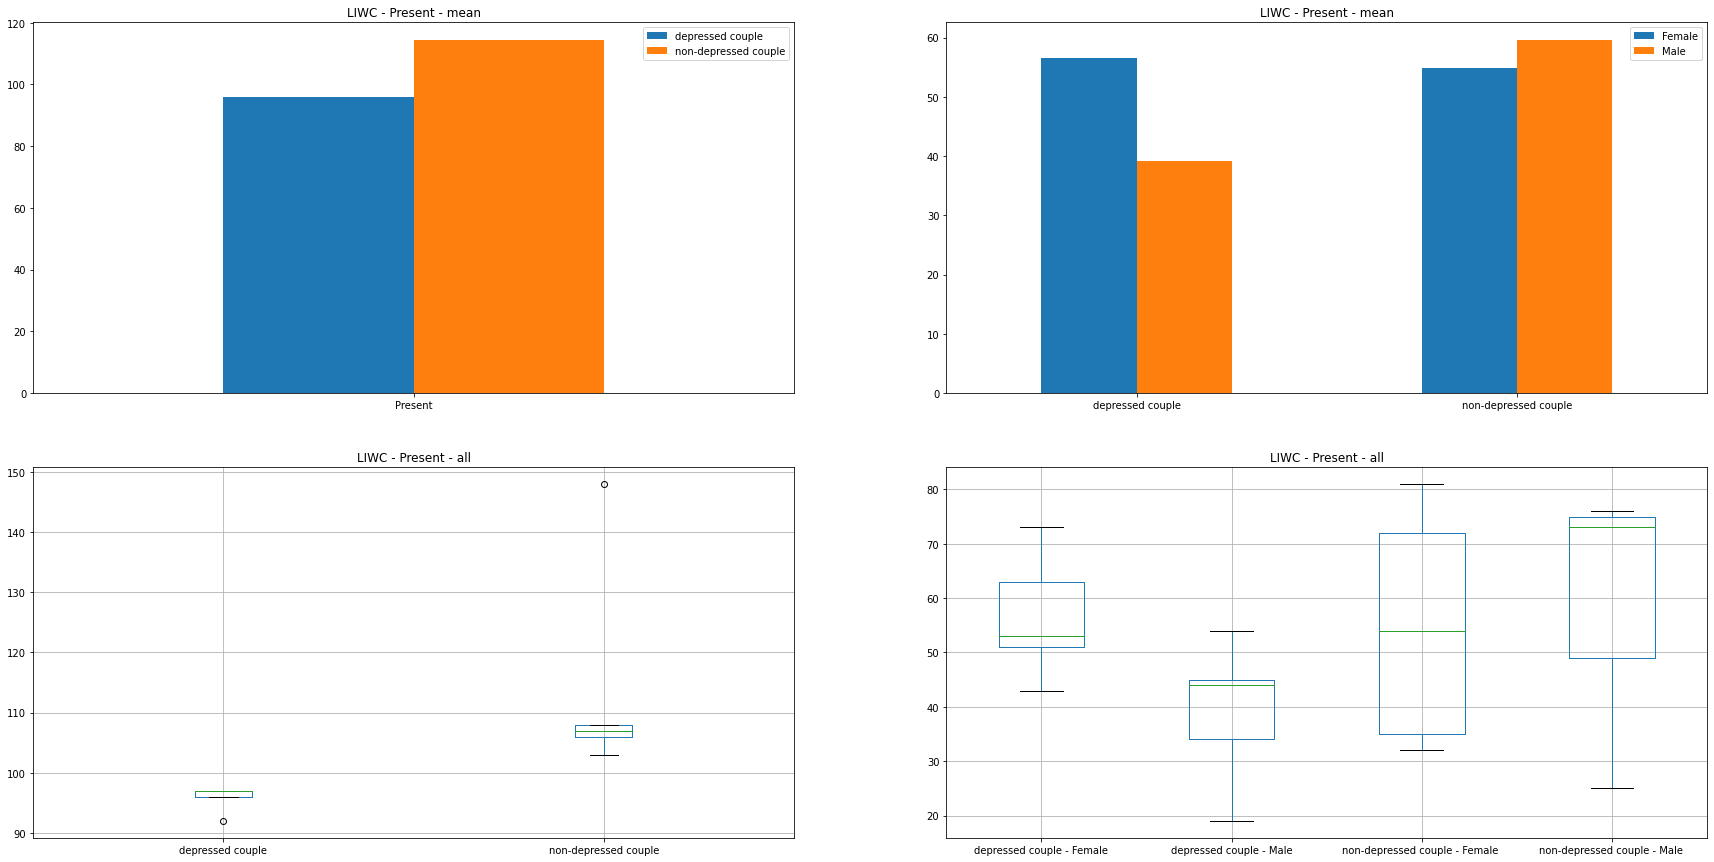

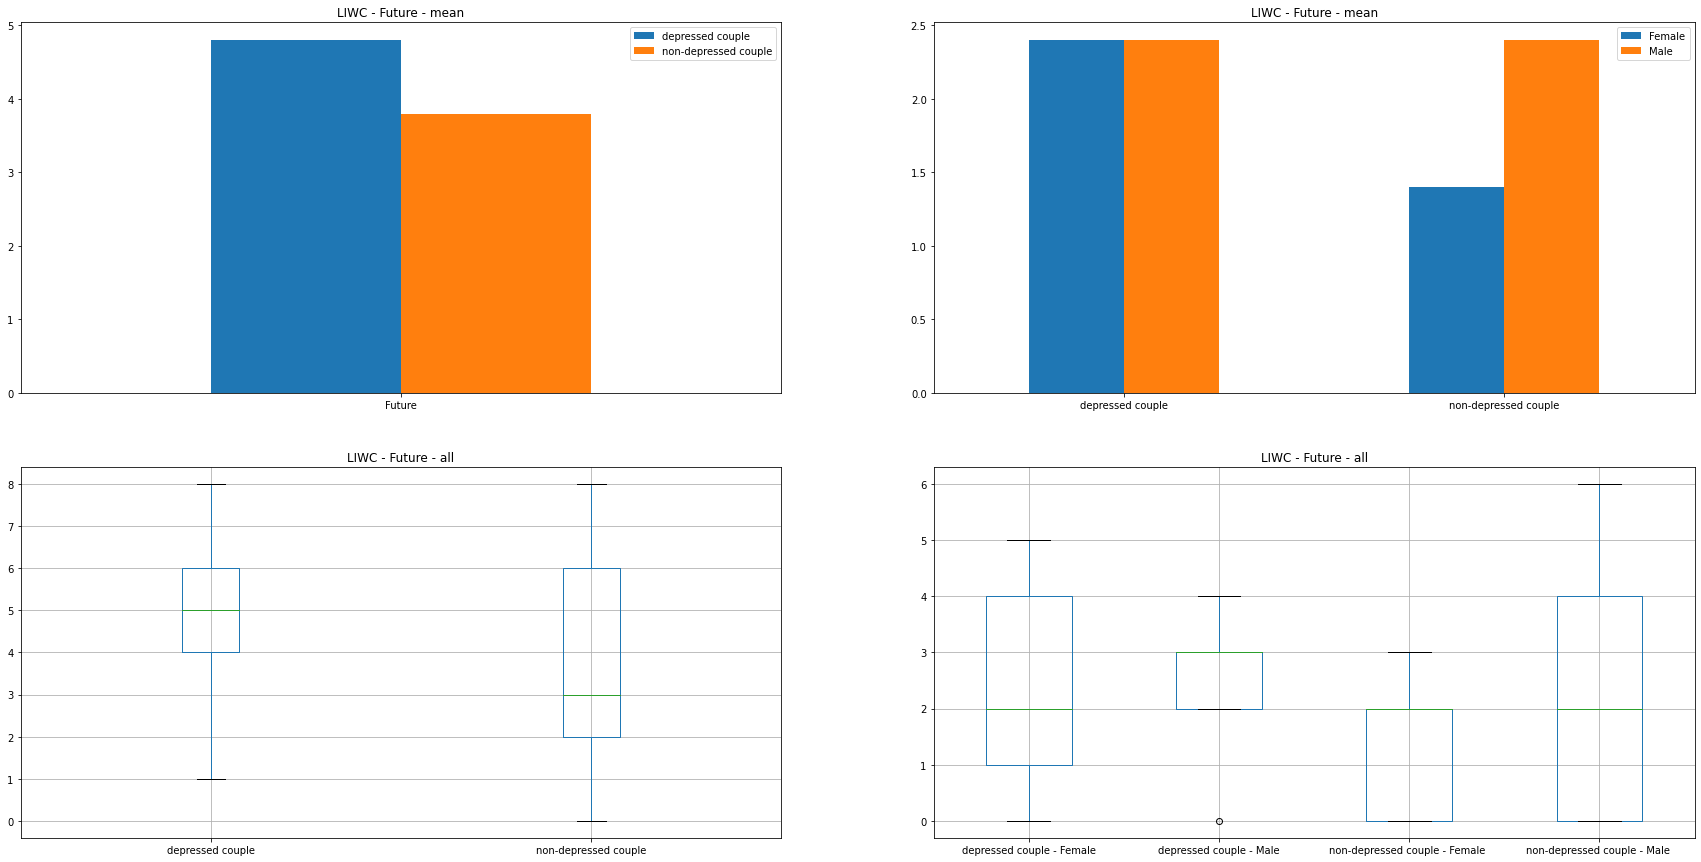

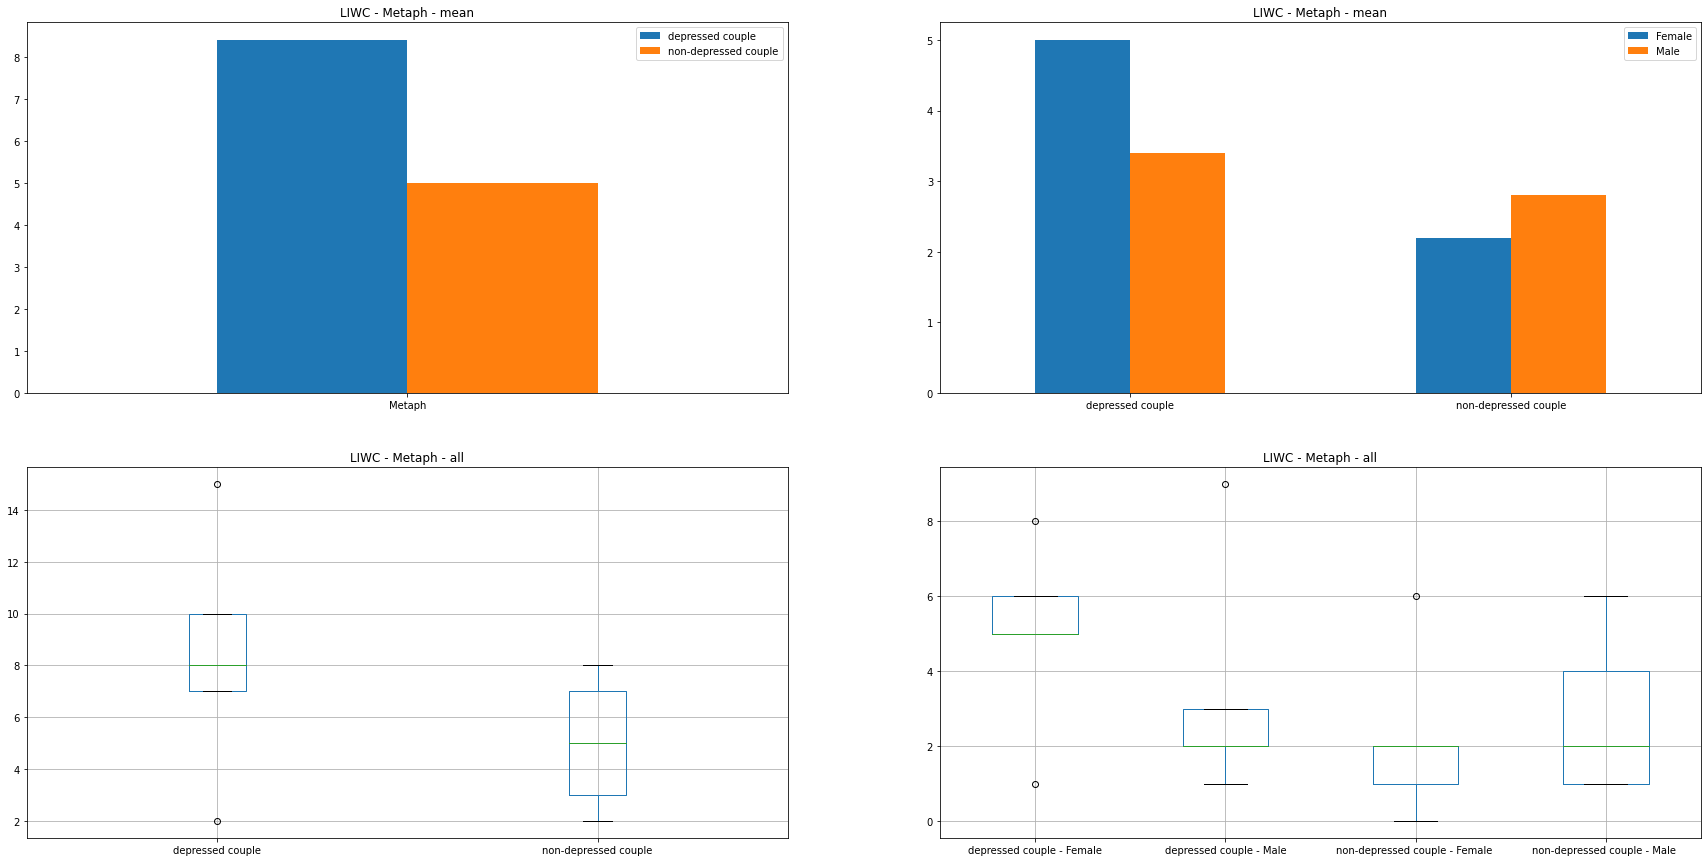

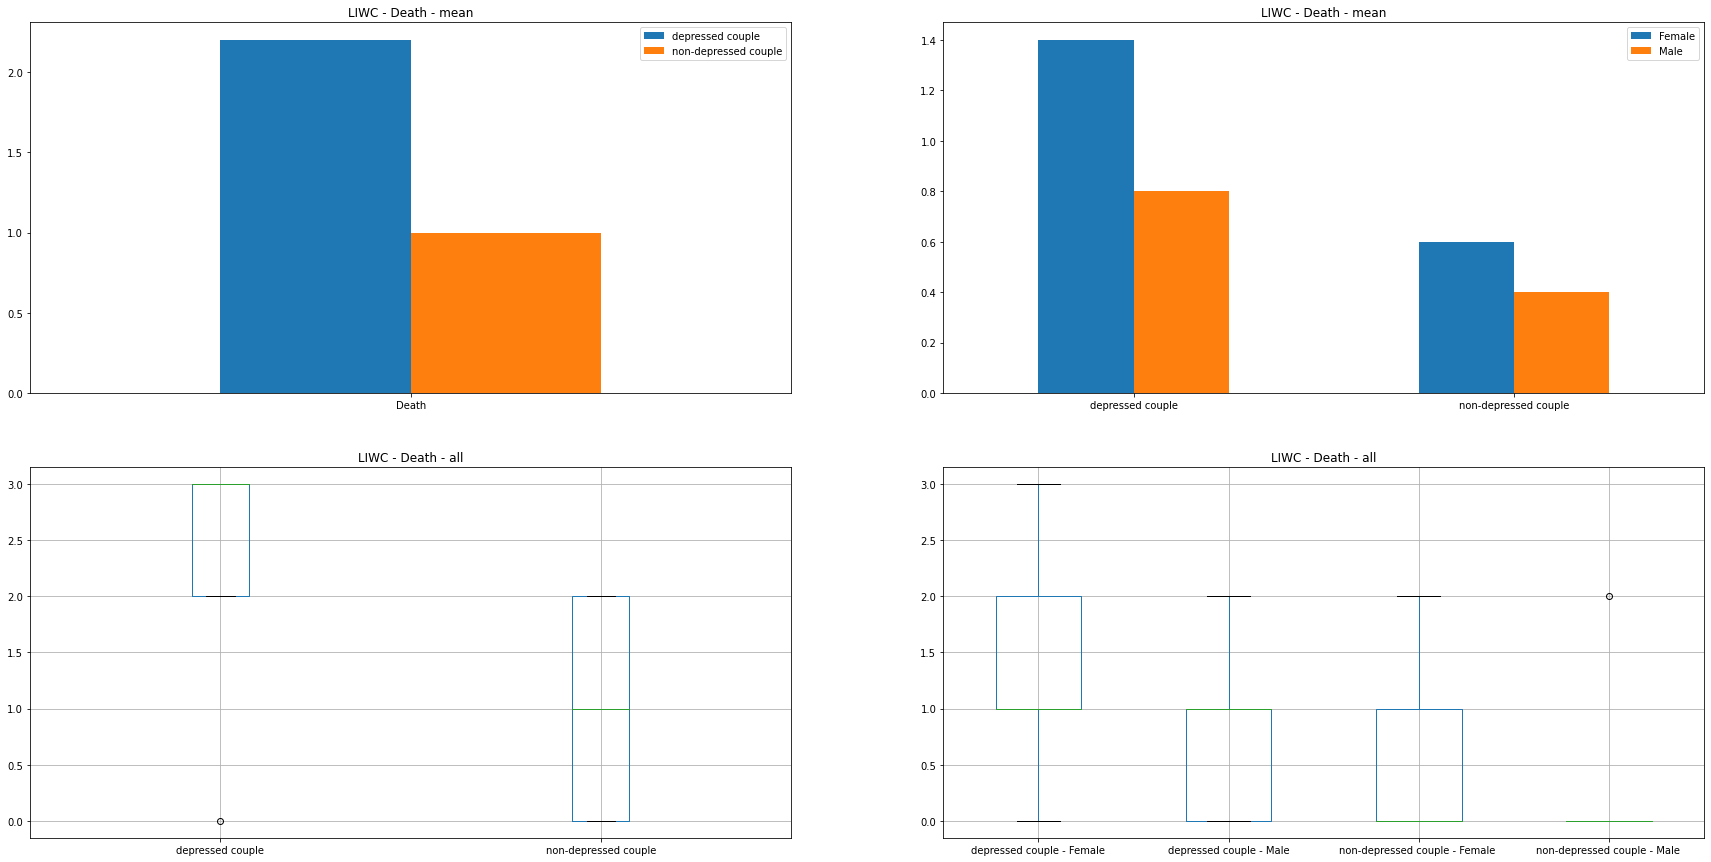

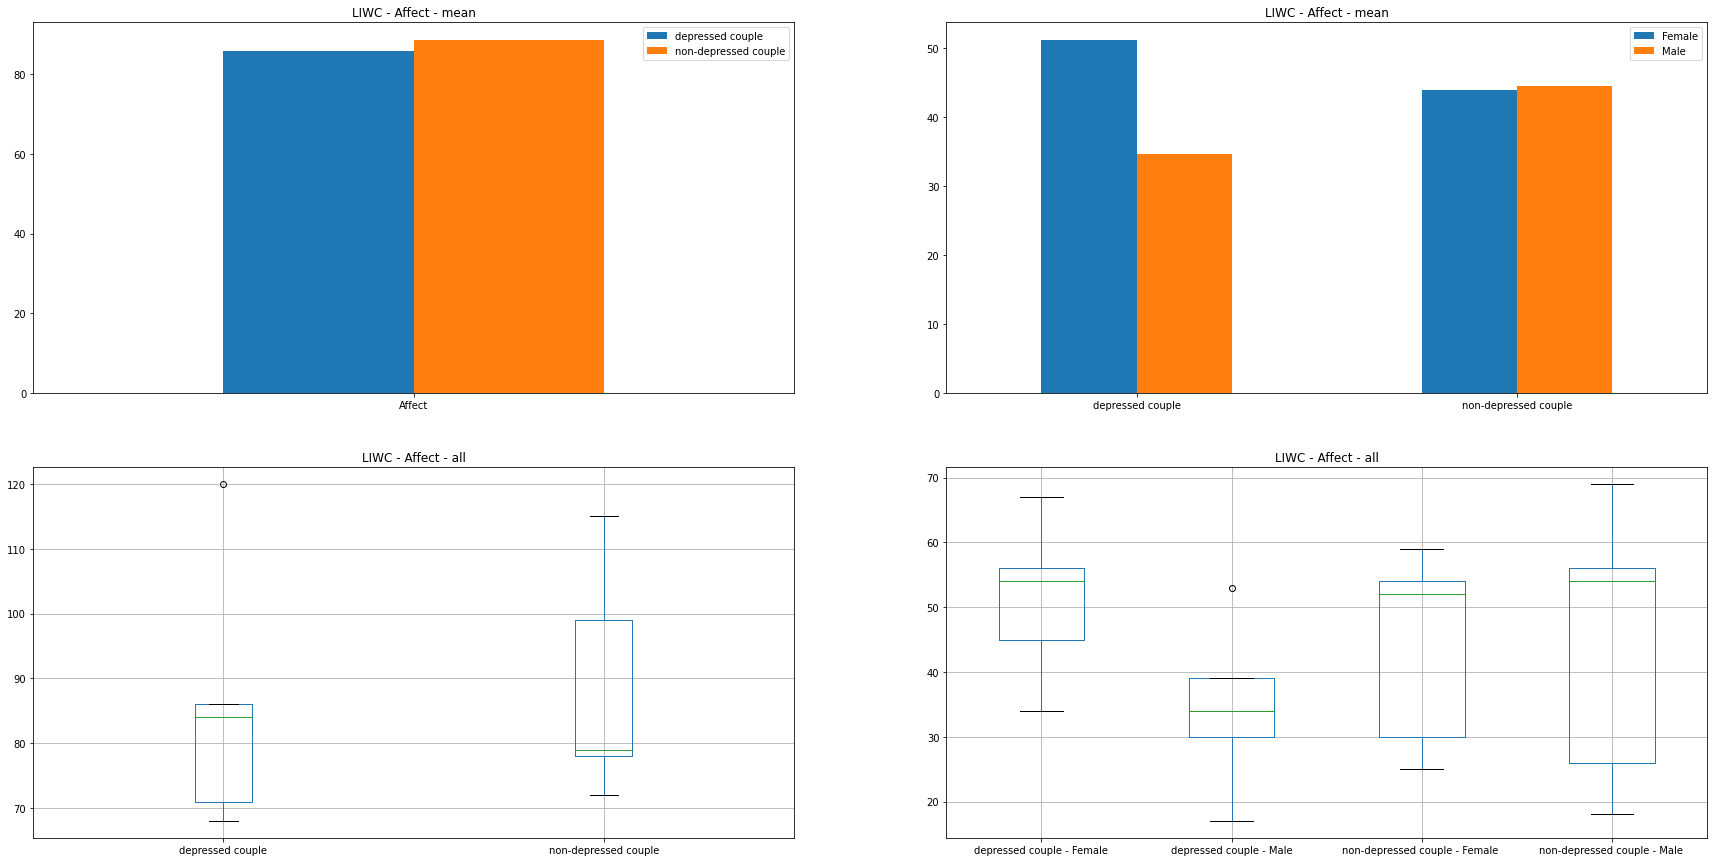

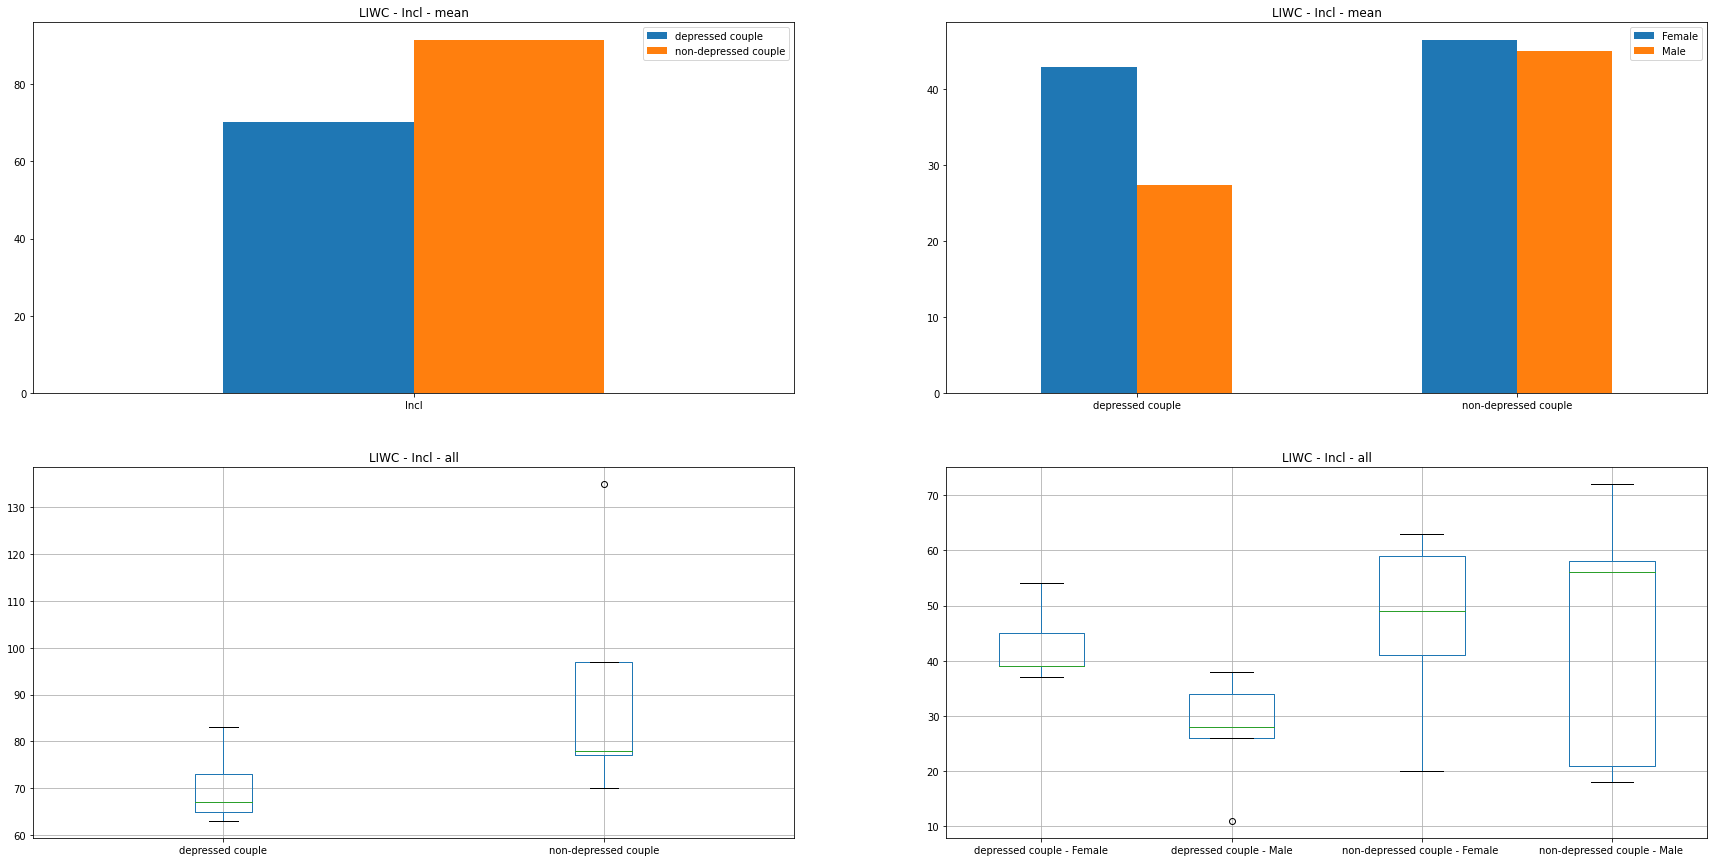

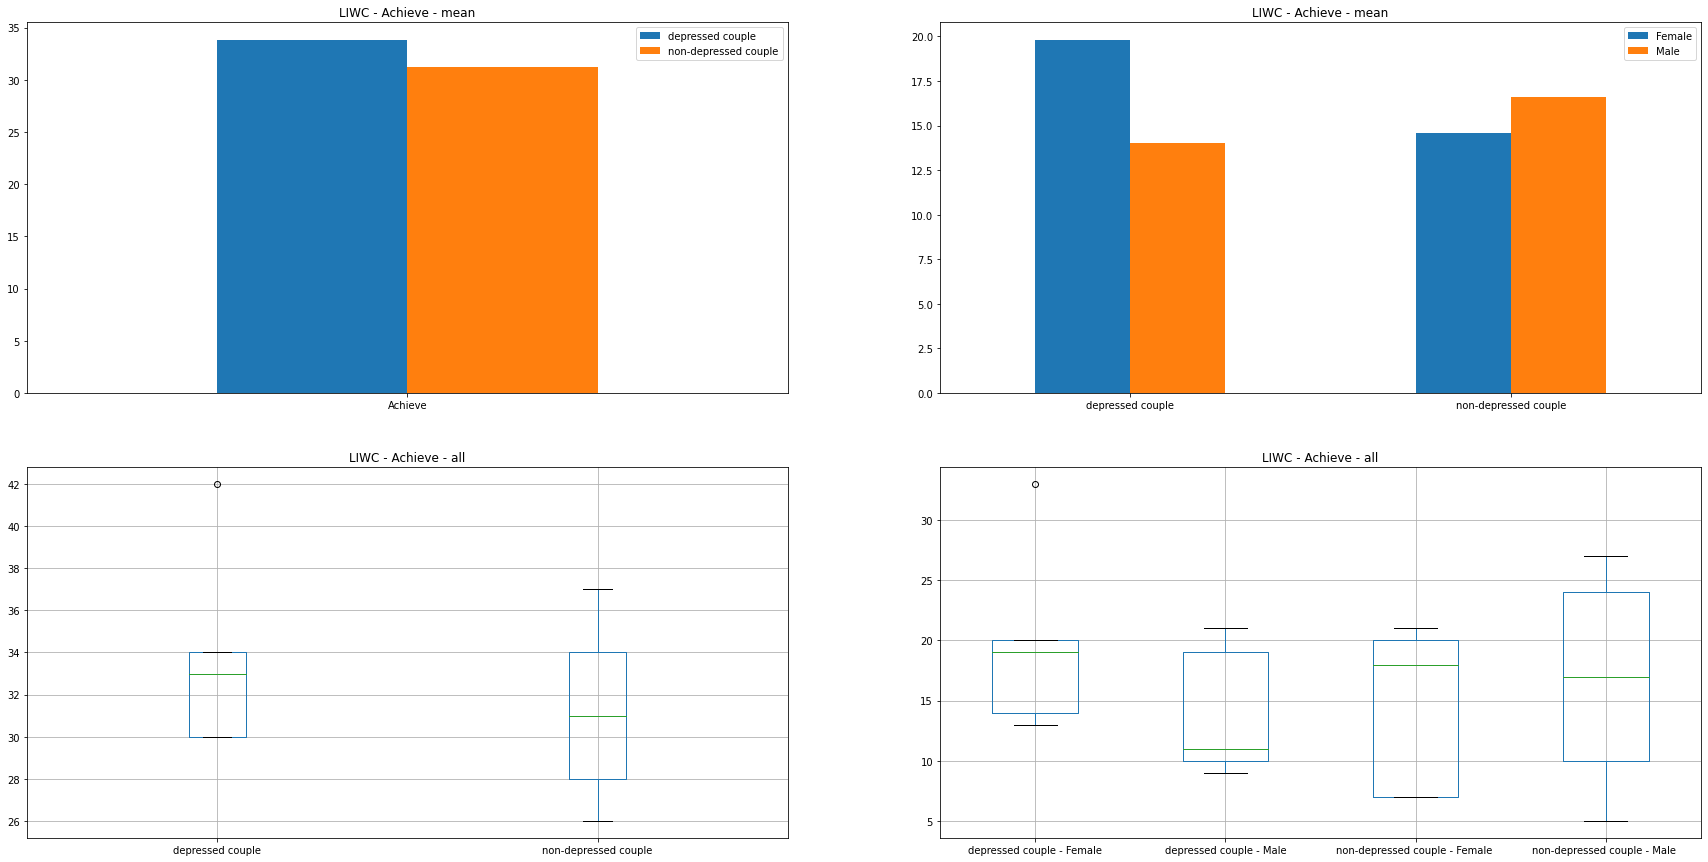

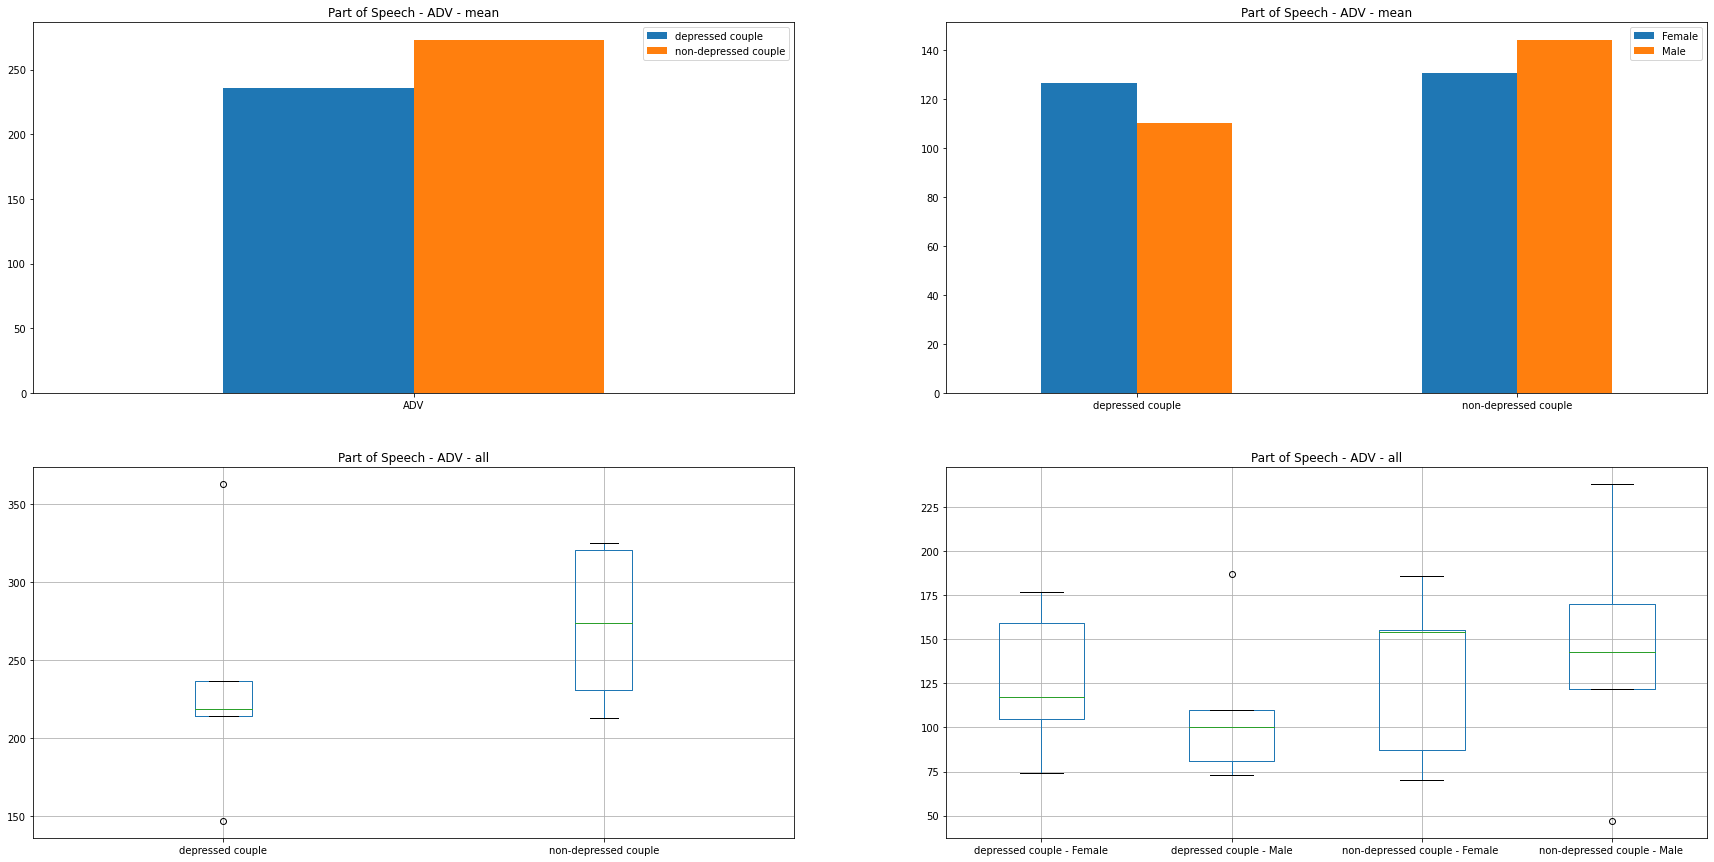

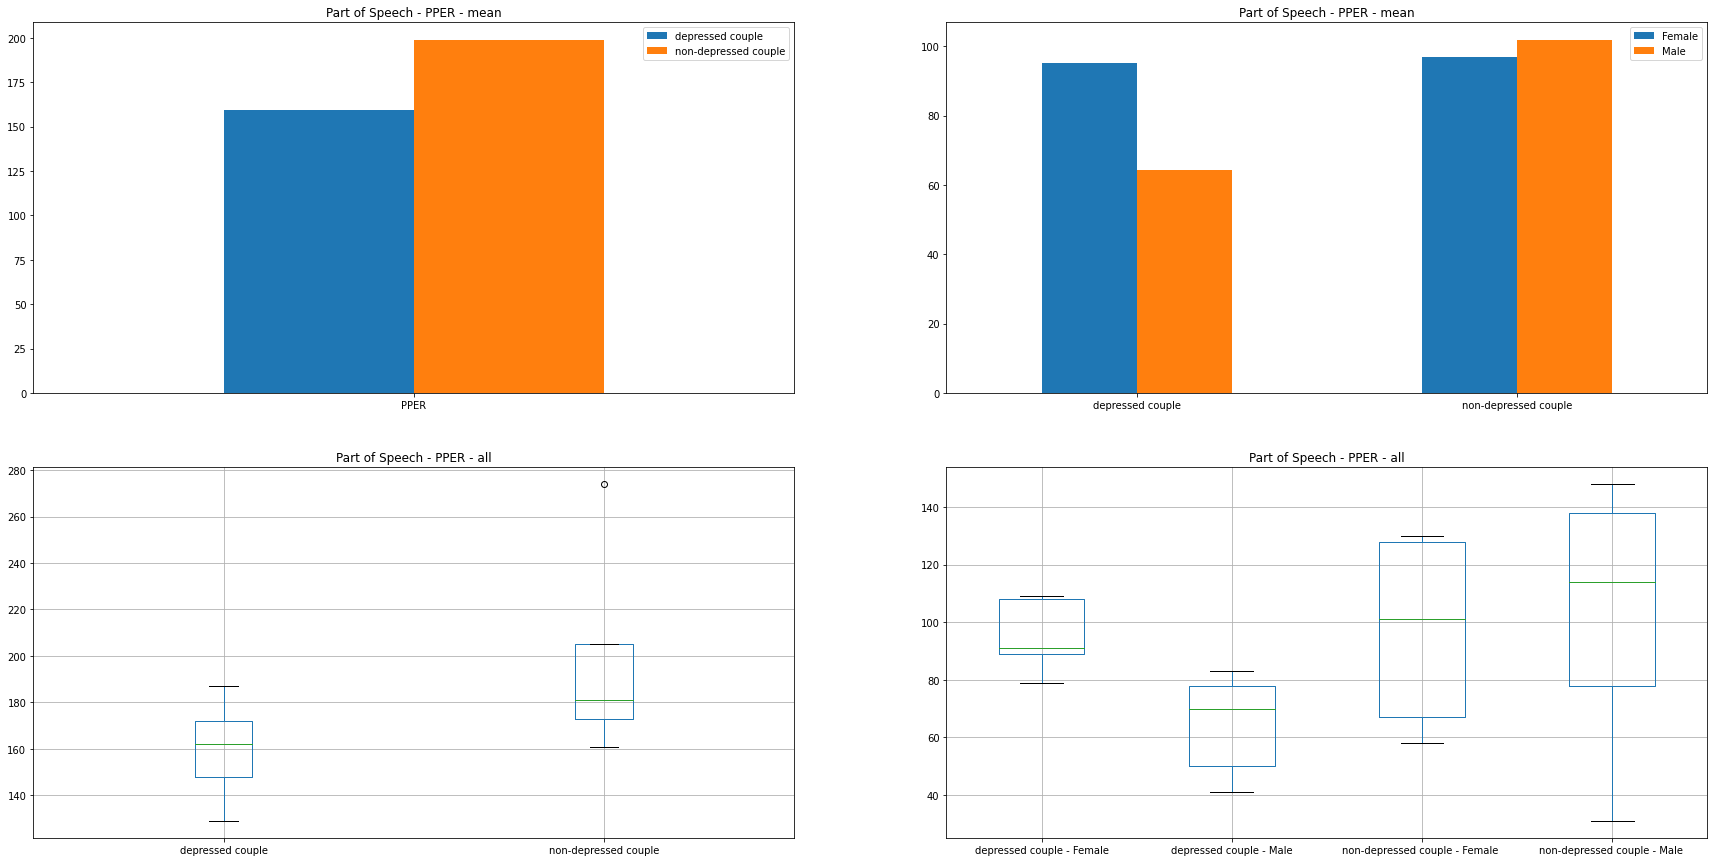

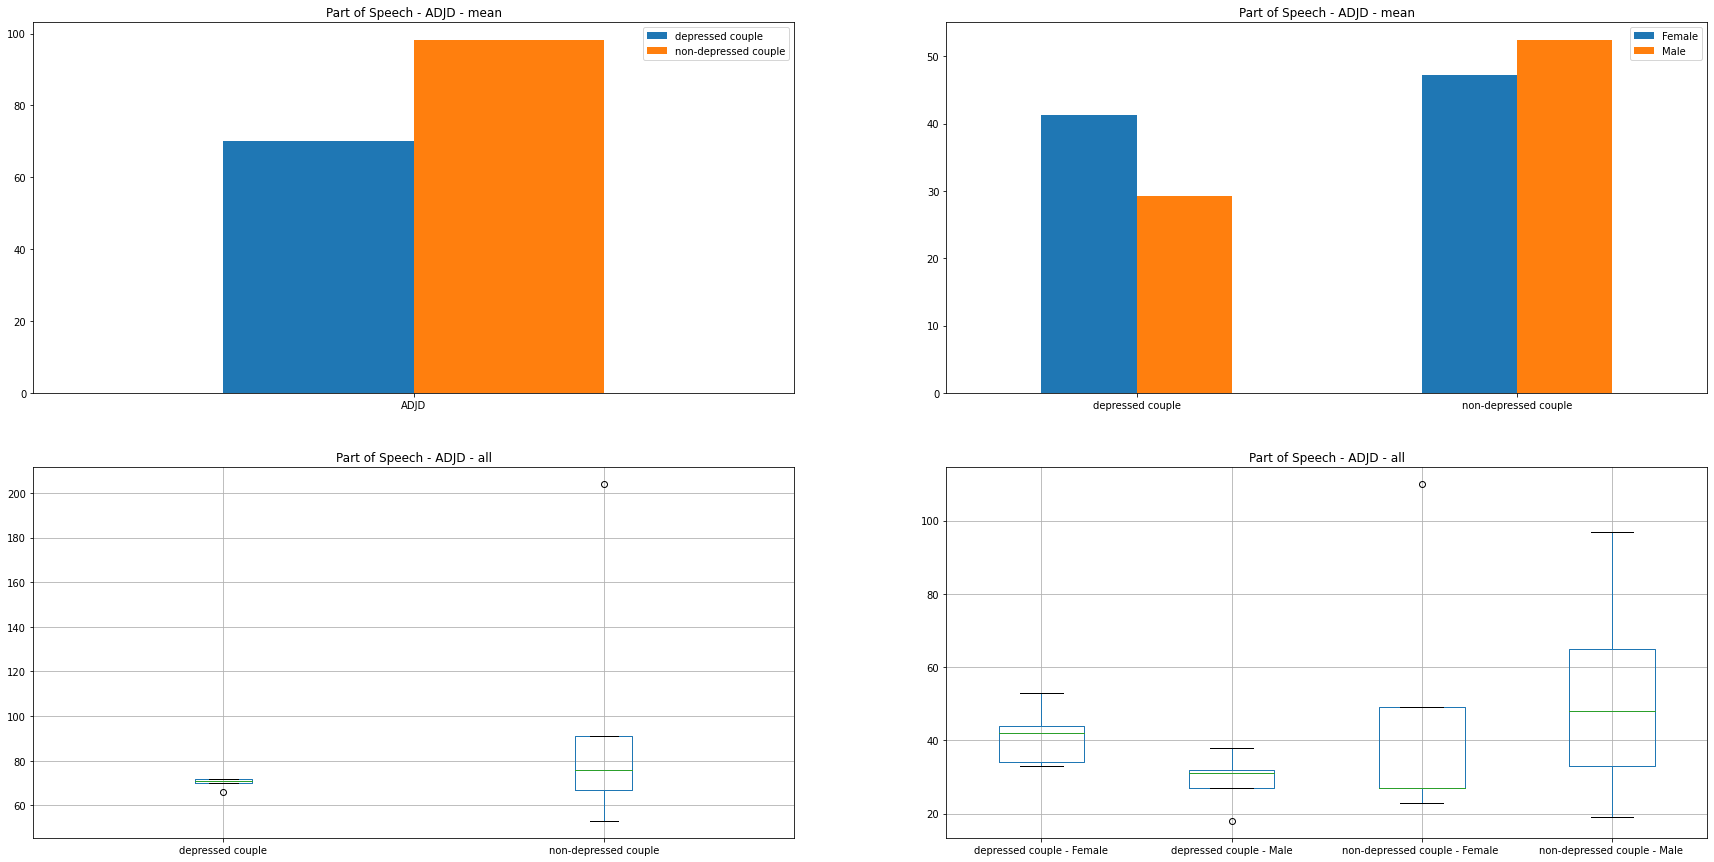

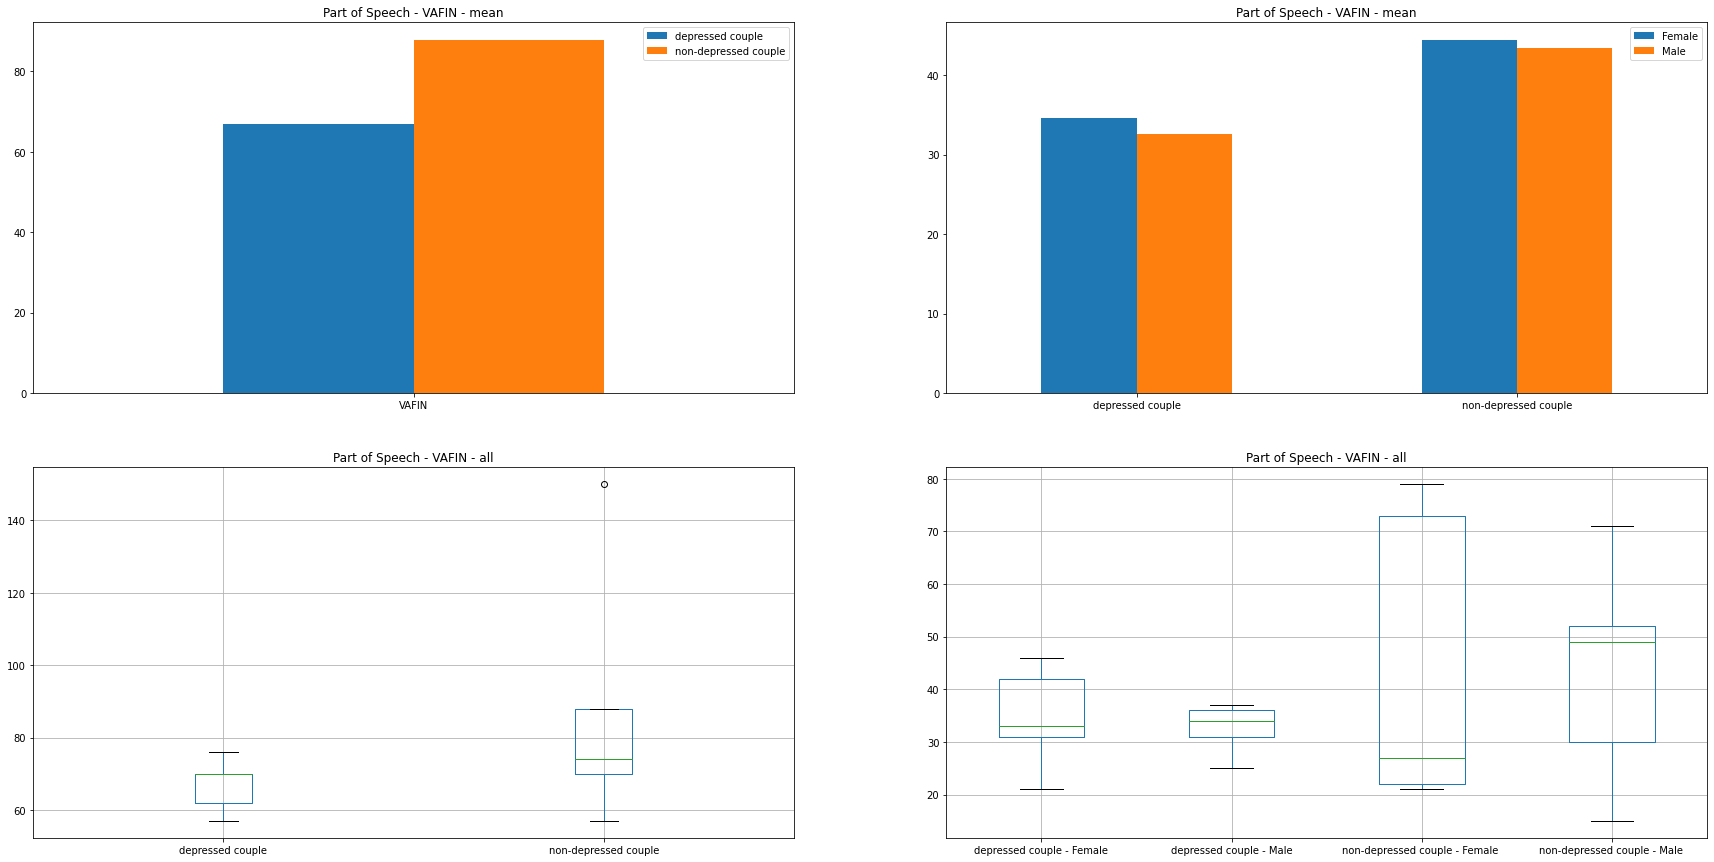

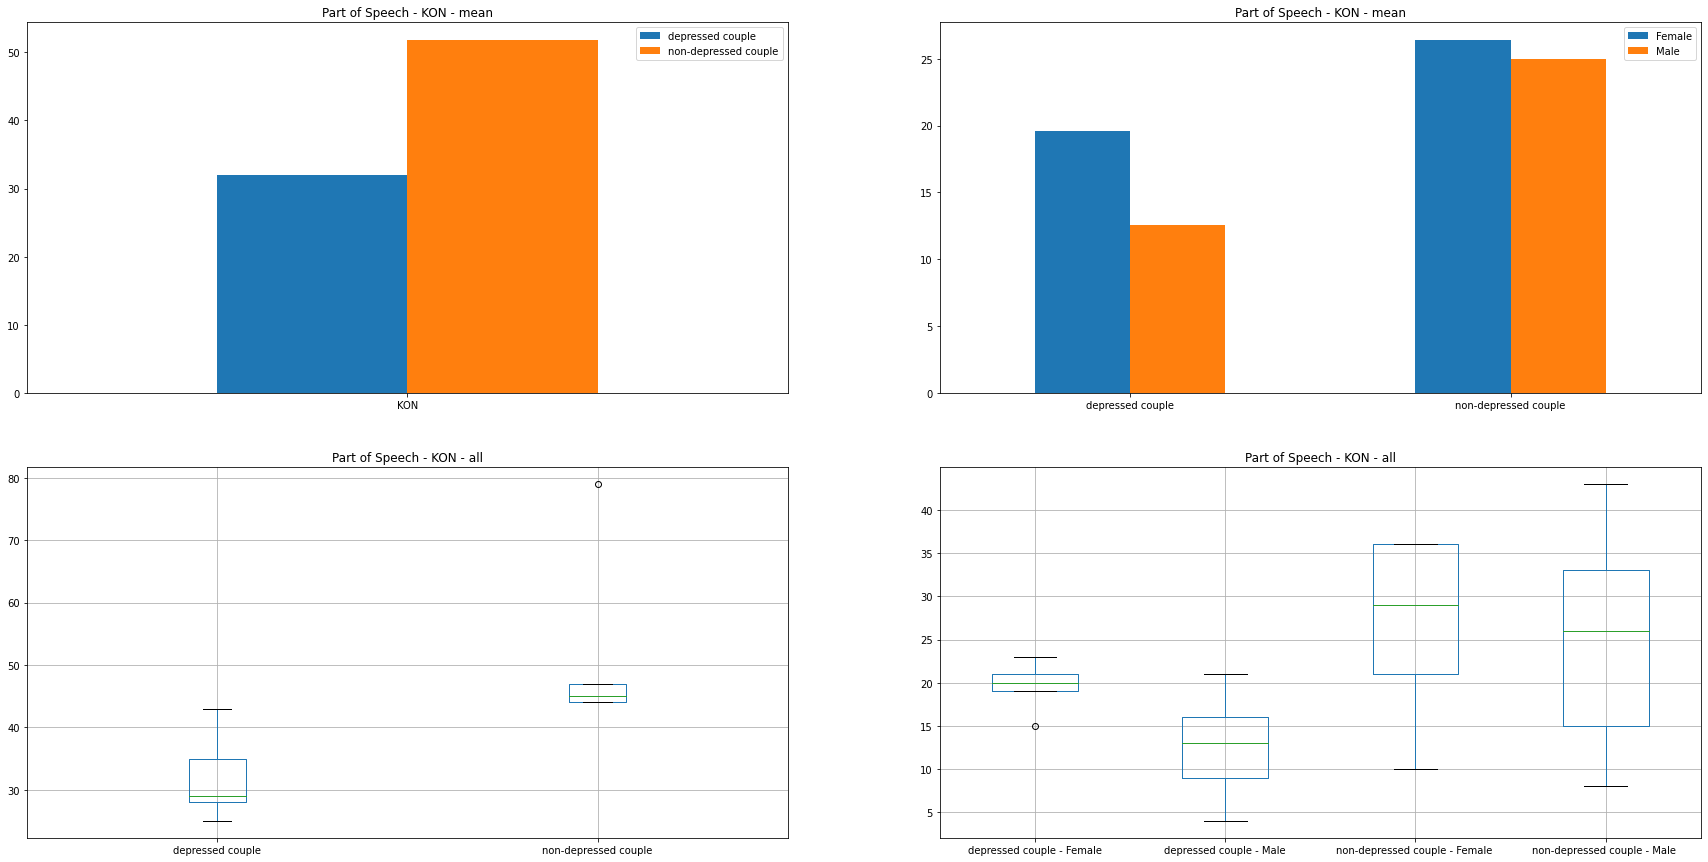

In [9]:
pipeline = Pipeline(queryable=queryable)

# Add components
pipeline.add_components([Tokenizer(), Stemmer(), Lemmatizer()])
pipeline.add_component(FeatureTFIDF(white_list=[
    'ja', 'auch', 'wenn', 'also', 'werden', 'schon', 'wir', 'und', 'haben', 'du', 'sehr'])),
pipeline.add_component(NaiveBayes(inputs=[TFIDF_DOCUMENT_MF], output=CLASSIFICATION_NAIVE_BAYES_TFIDF, voting=False))
pipeline.add_component(Liwc(white_list=[
    'Posemo', 'Past', 'Present', 'Future', 'Metaph','Death', 'Affect', 'Incl', 'Achieve'
]))
pipeline.add_component(NaiveBayes(inputs=[LIWC_DOCUMENT_MF], output=CLASSIFICATION_NAIVE_BAYES_LIWC, voting=False))
pipeline.add_component(PartOfSpeech(white_list=["ADV", "PPER", "ADJD", "VAFIN", "KON"]))

# Classify
pipeline.add_component(NaiveBayes(inputs=[POS_DOCUMENT_MF], output=CLASSIFICATION_NAIVE_BAYES_POS, voting=False))
pipeline.add_component(NaiveBayes(inputs=[
    CLASSIFICATION_NAIVE_BAYES_TFIDF, 
    CLASSIFICATION_NAIVE_BAYES_LIWC, 
    CLASSIFICATION_NAIVE_BAYES_POS,
], output=CLASSIFICATION_NAIVE_BAYES_VOTING, voting=True))

storage = pipeline.execute(visualise=True)

# Pipeline with single Classifier